<a href="https://colab.research.google.com/github/diegocp01/diegocp01-github.io/blob/main/Capstone_II_Supervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Crime dataset in Los Angeles since 2020 - Machine Learning Model Prediction

#### **Data:** *01/01/2020 - 05/31/2024*
#### **By** Diego Cabezas, FL



# Predicting Crime Type

**Objective:**

Given the crime data, a useful objective for the LAPD could be to predict whether a crime will be violent or non-violent based on various features such as crime type, area of crime, time, and victim characteristics, date and weapon used if any.

•	**Target Variable:**

violent_crime:

1 for violent crime


0 for non-violent crime


•	**Features:**

	•	area name: Categorical (encoded as integers)
	•	vict age: Numeric
	•	vict sex: Categorical (encoded as integers)
	•	vict descent: Categorical (encoded as integers)
	•	weapon desc: Categorical (encoded as integers)
	•	year: Numeric
	•	month: Numeric
	•	day: Numeric
	•	hour: Numeric

#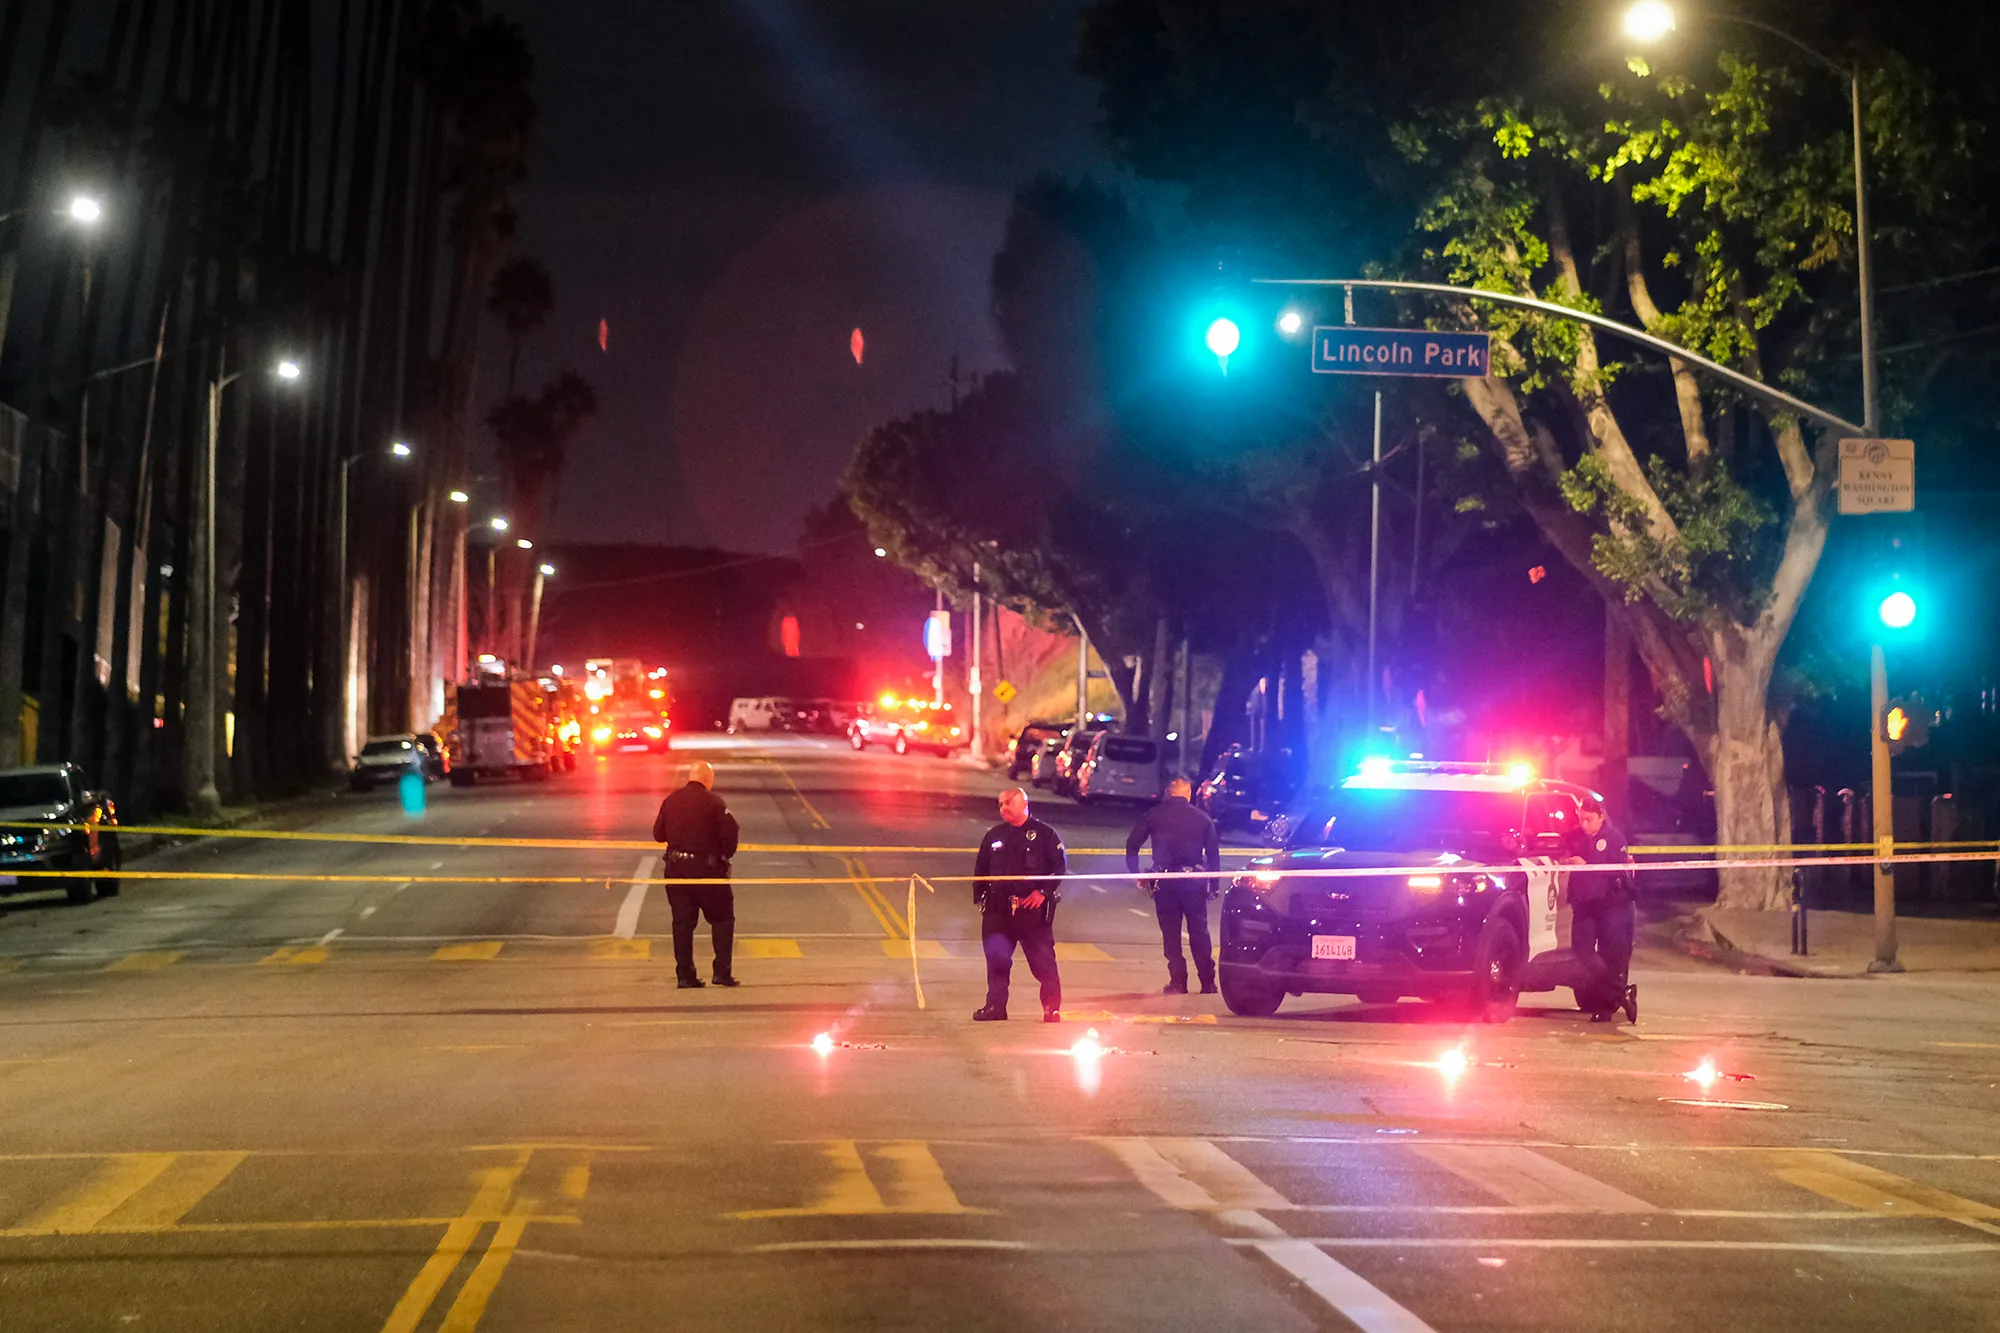



# Data Cleaning (EDA)

The data comes from [Data.gov](https://catalog.data.gov/dataset/crime-data-from-2020-to-present) and contains 947,775 observations and 28 variables.

**Columns details**

https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8/about_data

## Variable types

In [419]:
import time
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

import warnings
warnings.filterwarnings('ignore')

start = time.time()

In [420]:
crime_la = pd.read_csv("/content/Crime_Data_from_2020_to_Present-2.csv")

# Convert column headers to lower case for ease of coding
crime_la.columns = crime_la.columns.str.lower()
print(crime_la.shape)


crime_la.info()

(947775, 28)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947775 entries, 0 to 947774
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   dr_no           947775 non-null  int64  
 1   date rptd       947775 non-null  object 
 2   date occ        947775 non-null  object 
 3   time occ        947775 non-null  int64  
 4   area            947775 non-null  int64  
 5   area name       947775 non-null  object 
 6   rpt dist no     947775 non-null  int64  
 7   part 1-2        947775 non-null  int64  
 8   crm cd          947775 non-null  int64  
 9   crm cd desc     947775 non-null  object 
 10  mocodes         813530 non-null  object 
 11  vict age        947775 non-null  int64  
 12  vict sex        820143 non-null  object 
 13  vict descent    820133 non-null  object 
 14  premis cd       947765 non-null  float64
 15  premis desc     947208 non-null  object 
 16  weapon used cd  324658 non-null  float64
 1

In [421]:
crime_la.head()

,dr_no,date rptd,date occ,time occ,area,area name,rpt dist no,part 1-2,crm cd,crm cd desc,...,status,status desc,crm cd 1,crm cd 2,crm cd 3,crm cd 4,location,cross street,lat,lon
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


Are all the types visually the same compared to .head()?

**Target Variable= 'crm cd desc'** is Continuous or Categorical?

In [422]:
# UNIQUE VALUES
crime_la.nunique()

dr_no             947775
date rptd           1609
date occ            1609
time occ            1439
area                  21
area name             21
rpt dist no         1209
part 1-2               2
crm cd               139
crm cd desc          139
mocodes           306996
vict age             104
vict sex               5
vict descent          20
premis cd            314
premis desc          306
weapon used cd        79
weapon desc           79
status                 6
status desc            6
crm cd 1             141
crm cd 2             126
crm cd 3              37
crm cd 4               6
location           65757
cross street       10181
lat                 5422
lon                 4979
dtype: int64

In [423]:
# Display unique values and their counts in the 'crm_cd_desc' column
crime_type_counts = crime_la['crm cd desc'].value_counts()
print("Unique Crime Types and their Counts:")
print(crime_type_counts)

Unique Crime Types and their Counts:
crm cd desc
VEHICLE - STOLEN                                      102886
BATTERY - SIMPLE ASSAULT                               74541
BURGLARY FROM VEHICLE                                  58578
THEFT OF IDENTITY                                      58518
BURGLARY                                               57527
                                                       ...  
BLOCKING DOOR INDUCTION CENTER                             6
FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)         5
DISHONEST EMPLOYEE ATTEMPTED THEFT                         4
FIREARMS RESTRAINING ORDER (FIREARMS RO)                   4
TRAIN WRECKING                                             1
Name: count, Length: 139, dtype: int64


**Conclusion:**

Categorical variable


--Classification problem--

## Missing values

In [424]:
# Detect missing values

# This function returns True if an element has no value; otherwise,
# it returns None or False for each element in a DataFrame.
crime_la.isnull()

,dr_no,date rptd,date occ,time occ,area,area name,rpt dist no,part 1-2,crm cd,crm cd desc,...,status,status desc,crm cd 1,crm cd 2,crm cd 3,crm cd 4,location,cross street,lat,lon
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947770,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,False,True,False,False
947771,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,False,False,False,False
947772,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,False,True,False,False
947773,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,False,False,False,False


In [425]:
# List unique values in each column with 10 or fewer unique values
for column_name in crime_la.columns:
    if crime_la[column_name].nunique() <= 10:
        print(f"Unique values in column {column_name} are: {crime_la[column_name].unique()}")

Unique values in column part 1-2 are: [1 2]
Unique values in column vict sex are: ['M' 'X' 'F' nan 'H' '-']
Unique values in column status are: ['AA' 'IC' 'JA' 'AO' 'JO' 'CC']
Unique values in column status desc are: ['Adult Arrest' 'Invest Cont' 'Juv Arrest' 'Adult Other' 'Juv Other' 'UNK']
Unique values in column crm cd 4 are: [ nan 998. 930. 821. 910. 999. 946.]


In [426]:
# Check for missing values
missing_values = crime_la.isnull().sum()
print(missing_values)

dr_no                  0
date rptd              0
date occ               0
time occ               0
area                   0
area name              0
rpt dist no            0
part 1-2               0
crm cd                 0
crm cd desc            0
mocodes           134245
vict age               0
vict sex          127632
vict descent      127642
premis cd             10
premis desc          567
weapon used cd    623117
weapon desc       623117
status                 0
status desc            0
crm cd 1              11
crm cd 2          879451
crm cd 3          945489
crm cd 4          947711
location               0
cross street      799732
lat                    0
lon                    0
dtype: int64


In [427]:
# % of missing values
crime_la.isnull().sum()*100/crime_la.isnull().count()

dr_no              0.000000
date rptd          0.000000
date occ           0.000000
time occ           0.000000
area               0.000000
area name          0.000000
rpt dist no        0.000000
part 1-2           0.000000
crm cd             0.000000
crm cd desc        0.000000
mocodes           14.164227
vict age           0.000000
vict sex          13.466487
vict descent      13.467542
premis cd          0.001055
premis desc        0.059824
weapon used cd    65.745245
weapon desc       65.745245
status             0.000000
status desc        0.000000
crm cd 1           0.001161
crm cd 2          92.791116
crm cd 3          99.758804
crm cd 4          99.993247
location           0.000000
cross street      84.379942
lat                0.000000
lon                0.000000
dtype: float64

### Check for Empty string counts on categorical variables

What if yes?


' Replace empty with NaN

youtube_df.Grade = youtube_df.Grade.apply(str.strip).replace("", np.nan)

youtube_df.Grade.unique()'

In [428]:
# Initialize a flag to check if any columns with empty or trailing spaces are found
found = False

# Loop through each column in the DataFrame
for column in crime_la.columns:
    if crime_la[column].dtype == 'object':  # Check if the column is of type 'object'
        value_counts = crime_la[column].value_counts()  # Calculate value counts
        # Check for empty strings or strings that might contain only spaces
        if '' in value_counts.index or ' ' in value_counts.index:
            print(f"Value counts for column {column} (including empty/trailing spaces):\n{value_counts}\n")
            found = True  # Set the flag to True if such a column is found

# If no columns with empty or trailing spaces were found, print message
if not found:
    print("No variables found with empty strings or strings that contain only spaces.")


No variables found with empty strings or strings that contain only spaces.


### Handling missing values


*   Disregarding the rows with missing values?
*   Filling the missing values with some unharmful values?

Given the missing value percentages, a combination of both approaches might be the most effective:

1. Remove Columns with Excessive Missing Data:

**crm cd 2, crm cd 3, crm cd 4** (crime codes): These columns have over 90% missing data. It's unlikely they'll contribute meaningful information to your model, so removing them is a safe bet.
2. Impute Missing Values in Other Columns:

**mocodes, vict sex, vict descent**: These columns have a moderate amount of missing data (around 13-14%). Imputation methods like k-Nearest Neighbors (KNN) or Multiple Imputation by Chained Equations (MICE) could be suitable choices.


**weapon used cd, weapon desc**: These columns have a high percentage of missing values (65%). However, given the context of crime prediction, information about the weapon used could be crucial. Considering using a category like "Unknown" to replace missing values.


**premis desc, cross street**: These columns describe the location of the crime, which could be valuable for prediction. Imputation methods like KNN or using the most frequent category could be helpful.


**premis cd:** This column has a very low percentage of missing values (0.1%). Simple imputation methods like using the most frequent category should suffice.

**Remove Columns with Excessive Missing Data:
crm cd 2, crm cd 3, crm cd 4**

In [429]:
# Drop the 'crm cd 2', 'crm cd 3', 'crm cd 4' columns from the DataFrame
columns_to_drop = ['crm cd 2', 'crm cd 3', 'crm cd 4']
crime_la.drop(columns_to_drop, axis=1, inplace=True)

**Column 'mocodes' eliminated it wont be used the study:**
Modus Operandi: Activities associated with the suspect in commission of the crime. e.g: 2047 0400 0429 0444 1202 1822

In [430]:
# Drop the 'dr_no' column from the DataFrame
crime_la.drop('mocodes', axis=1, inplace=True)

**Column 'dr_no' eliminated it wont be used the study:**
Division of Records Number: Official file number made up of a 2 digit year, area ID, and 5 digits

In [431]:
# Drop the 'dr_no' column from the DataFrame
crime_la.drop('dr_no', axis=1, inplace=True)

### Filling in the missing values

In [432]:
# New % of missing values
crime_la.isnull().sum()*100/crime_la.isnull().count()

date rptd          0.000000
date occ           0.000000
time occ           0.000000
area               0.000000
area name          0.000000
rpt dist no        0.000000
part 1-2           0.000000
crm cd             0.000000
crm cd desc        0.000000
vict age           0.000000
vict sex          13.466487
vict descent      13.467542
premis cd          0.001055
premis desc        0.059824
weapon used cd    65.745245
weapon desc       65.745245
status             0.000000
status desc        0.000000
crm cd 1           0.001161
location           0.000000
cross street      84.379942
lat                0.000000
lon                0.000000
dtype: float64

**Missing values in 'vict sex':**
F - Female M - Male X - Unknown

In [433]:
# Display unique values in the 'vict_sex' column
unique_vict_sex = crime_la['vict sex'].unique()
print(unique_vict_sex)

['M' 'X' 'F' nan 'H' '-']


In [434]:
# Print 'vict_sex' and 'vict_age' columns together
print(crime_la[['crm cd desc', 'vict age', 'vict sex']])


                                              crm cd desc  vict age vict sex
0                                        VEHICLE - STOLEN         0        M
1                                   BURGLARY FROM VEHICLE        47        M
2                                           BIKE - STOLEN        19        X
3                SHOPLIFTING-GRAND THEFT ($950.01 & OVER)        19        M
4                                       THEFT OF IDENTITY        28        M
...                                                   ...       ...      ...
947770    THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)        44        F
947771                           BATTERY - SIMPLE ASSAULT        80        F
947772           VANDALISM - MISDEAMEANOR ($399 OR UNDER)         0        X
947773     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT        70        F
947774  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...        37        M

[947775 rows x 3 columns]


In [435]:
# Condition to filter rows where 'vict_sex' is NaN, 'H', or '-'
conditions = crime_la['vict sex'].isin(['H', '-']) | crime_la['vict sex'].isnull()

# Filter the DataFrame based on the condition and select specific columns
filtered_data = crime_la[conditions][['crm cd desc', 'vict age', 'vict sex']]

# Print the filtered DataFrame
print(filtered_data)


                                            crm cd desc  vict age vict sex
13                                     VEHICLE - STOLEN         0      NaN
24                                     VEHICLE - STOLEN         0      NaN
27           EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)         0      NaN
33      THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)         0      NaN
34      THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)         0      NaN
...                                                 ...       ...      ...
947749                                 VEHICLE - STOLEN         0      NaN
947757                                 VEHICLE - STOLEN         0      NaN
947758                                 VEHICLE - STOLEN         0      NaN
947759  THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)         0      NaN
947761                                 VEHICLE - STOLEN         0      NaN

[127739 rows x 3 columns]


Many rows in the crime dataset have missing values for both 'vict_age' and 'vict_sex', likely due to privacy concerns, data collection challenges, reporting errors, the nature of certain crimes like vehicle theft where such details are less critical, or database management practices that may not enforce strict data completeness.


Columns that are not the features that will be used for the specific objective will be dropped.

In [436]:
# Replace 'NaN', 'H', '-' in 'vict sex' with 'X'
crime_la['vict sex'] = crime_la['vict sex'].replace(['H', '-'], 'X')
crime_la['vict sex'].fillna('X', inplace=True)

# Verify the changes by viewing the unique values in the 'vict_sex' column
print(crime_la['vict sex'].unique())

['M' 'X' 'F']


In [437]:
# New % of missing values
crime_la.isnull().sum()*100/crime_la.isnull().count()

date rptd          0.000000
date occ           0.000000
time occ           0.000000
area               0.000000
area name          0.000000
rpt dist no        0.000000
part 1-2           0.000000
crm cd             0.000000
crm cd desc        0.000000
vict age           0.000000
vict sex           0.000000
vict descent      13.467542
premis cd          0.001055
premis desc        0.059824
weapon used cd    65.745245
weapon desc       65.745245
status             0.000000
status desc        0.000000
crm cd 1           0.001161
location           0.000000
cross street      84.379942
lat                0.000000
lon                0.000000
dtype: float64

**Missing values in 'vict descent'**

Descent Code: A - Other Asian B - Black C - Chinese D - Cambodian F - Filipino G - Guamanian H - Hispanic/Latin/Mexican I - American Indian/Alaskan Native J - Japanese K - Korean L - Laotian O - Other P - Pacific Islander S - Samoan U - Hawaiian V - Vietnamese W - White X - Unknown Z - Asian Indian

In [438]:
# 'vict descent'
# Display unique values
unique_vict_descent = crime_la['vict descent'].unique()
print(unique_vict_descent)

['O' 'X' 'H' 'B' 'W' nan 'A' 'C' 'K' 'J' 'F' 'I' 'V' 'S' 'P' 'Z' 'G' 'U'
 'D' 'L' '-']


In [439]:
# Filter rows where 'vict_descent' is either 'nan' (NaN) or '-'
filtered_data = crime_la[(crime_la['vict descent'] == '-') | (crime_la['vict descent'].isna())]

# Select only the desired columns
filtered_data = filtered_data[['vict descent', 'vict sex', 'vict age', 'crm cd desc']]

# Display the filtered rows with the selected columns
print(filtered_data)

       vict descent vict sex  vict age  \
13              NaN        X         0   
24              NaN        X         0   
27              NaN        X         0   
33              NaN        X         0   
34              NaN        X         0   
...             ...      ...       ...   
947749          NaN        X         0   
947757          NaN        X         0   
947758          NaN        X         0   
947759          NaN        X         0   
947761          NaN        X         0   

                                            crm cd desc  
13                                     VEHICLE - STOLEN  
24                                     VEHICLE - STOLEN  
27           EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)  
33      THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)  
34      THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)  
...                                                 ...  
947749                                 VEHICLE - STOLEN  
947757                         

In [440]:
# Replace 'nan' and '-' with 'X' for unknown or unrecorded values
crime_la['vict descent'].replace('-', 'X', inplace=True)
crime_la['vict descent'].replace(np.nan, 'X', inplace=True)

# Verify the changes by viewing the unique values in the 'vict_descent' column
print(crime_la['vict descent'].unique())

['O' 'X' 'H' 'B' 'W' 'A' 'C' 'K' 'J' 'F' 'I' 'V' 'S' 'P' 'Z' 'G' 'U' 'D'
 'L']


In [441]:
# New % of missing values
crime_la.isnull().sum()*100/crime_la.isnull().count()

date rptd          0.000000
date occ           0.000000
time occ           0.000000
area               0.000000
area name          0.000000
rpt dist no        0.000000
part 1-2           0.000000
crm cd             0.000000
crm cd desc        0.000000
vict age           0.000000
vict sex           0.000000
vict descent       0.000000
premis cd          0.001055
premis desc        0.059824
weapon used cd    65.745245
weapon desc       65.745245
status             0.000000
status desc        0.000000
crm cd 1           0.001161
location           0.000000
cross street      84.379942
lat                0.000000
lon                0.000000
dtype: float64

**Missing values in 'premis cd'**

FLOAT


The type of structure, vehicle, or location where the crime took place.

In [442]:
crime_la.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947775 entries, 0 to 947774
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date rptd       947775 non-null  object 
 1   date occ        947775 non-null  object 
 2   time occ        947775 non-null  int64  
 3   area            947775 non-null  int64  
 4   area name       947775 non-null  object 
 5   rpt dist no     947775 non-null  int64  
 6   part 1-2        947775 non-null  int64  
 7   crm cd          947775 non-null  int64  
 8   crm cd desc     947775 non-null  object 
 9   vict age        947775 non-null  int64  
 10  vict sex        947775 non-null  object 
 11  vict descent    947775 non-null  object 
 12  premis cd       947765 non-null  float64
 13  premis desc     947208 non-null  object 
 14  weapon used cd  324658 non-null  float64
 15  weapon desc     324658 non-null  object 
 16  status          947775 non-null  object 
 17  status des

In [443]:
crime_la['premis cd']

0         101.0
1         128.0
2         502.0
3         405.0
4         102.0
          ...  
947770    104.0
947771    124.0
947772    503.0
947773    102.0
947774    122.0
Name: premis cd, Length: 947775, dtype: float64

In [444]:
# Display unique values
unique_premis = crime_la['premis cd'].unique()
print(unique_premis)

[101. 128. 502. 405. 102. 501. 248. 750. 751. 203. 108. 504. 605. 404.
 221. 707. 209. 702. 726. 801. 729. 602. 725. 737. 124. 720. 116. 103.
 122. 506. 212. 505. 701. 112. 710. 120. 406. 721. 145. 503. 735. 604.
 109. 712. 717. 708. 104. 152. 607. 238. 222. 119. 507. 514. 125. 220.
 154. 704. 740. 243. 517. 802. 732. 943. 121. 111. 804. 207. 518. 301.
 127. 403. 210. 733. 510. 603. 208. 123. 135. 410. 247. 217. 719. 412.
 834. 401. 402. 727. 155. 724. 906. 231. 235. 242. 146. 903. 232. 253.
 949. 706. 868. 252. 118. 254. 218. 156. 202. 511. 409. 142. 913. 945.
 214. 736. 713. 213. 753. 249. 921. 251. 138. 835. 508. 114. 418. 302.
 158. 904. 415. 516. 722. 755. 229. 241. 408. 117. 946. 106. 256. 417.
 709. 201. 515. 730. 966. 411. 718. 211. 728. 703. 407. 219. 741. 935.
 752. 738. 413. 744. 416. 206. 244. 900. 255. 519. 754. 916. 509. 901.
 237. 885. 942. 922. 151. 971. 239. 140. 912. 606. 150. 144. 110. 723.
 230. 902. 705. 716. 157. 141. 948. 115. 303. 908. 905. 895. 107. 745.
 205. 

In [445]:
# Filter rows where 'premis_cd' is NaN
filtered_data = crime_la[crime_la['premis cd'].isna()]

# Select only the desired columns
filtered_data = filtered_data[['premis cd', 'vict sex', 'vict age', 'crm cd desc']]

# Display the filtered rows with the selected columns
print(filtered_data)

        premis cd vict sex  vict age  \
73643         NaN        X         0   
104268        NaN        X         0   
341857        NaN        X         0   
380677        NaN        X         0   
386838        NaN        X         0   
502900        NaN        X         0   
508143        NaN        X         0   
540439        NaN        X         0   
646456        NaN        X         0   
708127        NaN        F        57   

                                            crm cd desc  
73643                                  VEHICLE - STOLEN  
104268                                 VEHICLE - STOLEN  
341857  THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)  
380677  THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)  
386838                        OTHER MISCELLANEOUS CRIME  
502900                         VEHICLE - ATTEMPT STOLEN  
508143                         VEHICLE - ATTEMPT STOLEN  
540439  THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)  
646456  THEFT FROM MOTOR VEHICLE - PE

In [446]:
# code for UNKNOWN = 10 to keep the float type instead of 'X'
# Replace NaN values in 'premis cd' with 10
crime_la['premis cd'].fillna(10, inplace=True)

# Verify the changes
print(crime_la['premis cd'].unique())

[101. 128. 502. 405. 102. 501. 248. 750. 751. 203. 108. 504. 605. 404.
 221. 707. 209. 702. 726. 801. 729. 602. 725. 737. 124. 720. 116. 103.
 122. 506. 212. 505. 701. 112. 710. 120. 406. 721. 145. 503. 735. 604.
 109. 712. 717. 708. 104. 152. 607. 238. 222. 119. 507. 514. 125. 220.
 154. 704. 740. 243. 517. 802. 732. 943. 121. 111. 804. 207. 518. 301.
 127. 403. 210. 733. 510. 603. 208. 123. 135. 410. 247. 217. 719. 412.
 834. 401. 402. 727. 155. 724. 906. 231. 235. 242. 146. 903. 232. 253.
 949. 706. 868. 252. 118. 254. 218. 156. 202. 511. 409. 142. 913. 945.
 214. 736. 713. 213. 753. 249. 921. 251. 138. 835. 508. 114. 418. 302.
 158. 904. 415. 516. 722. 755. 229. 241. 408. 117. 946. 106. 256. 417.
 709. 201. 515. 730. 966. 411. 718. 211. 728. 703. 407. 219. 741. 935.
 752. 738. 413. 744. 416. 206. 244. 900. 255. 519. 754. 916. 509. 901.
 237. 885. 942. 922. 151. 971. 239. 140. 912. 606. 150. 144. 110. 723.
 230. 902. 705. 716. 157. 141. 948. 115. 303. 908. 905. 895. 107. 745.
 205. 

In [447]:
# New % of missing values
crime_la.isnull().sum()*100/crime_la.isnull().count()

date rptd          0.000000
date occ           0.000000
time occ           0.000000
area               0.000000
area name          0.000000
rpt dist no        0.000000
part 1-2           0.000000
crm cd             0.000000
crm cd desc        0.000000
vict age           0.000000
vict sex           0.000000
vict descent       0.000000
premis cd          0.000000
premis desc        0.059824
weapon used cd    65.745245
weapon desc       65.745245
status             0.000000
status desc        0.000000
crm cd 1           0.001161
location           0.000000
cross street      84.379942
lat                0.000000
lon                0.000000
dtype: float64

**Missing values in 'premis desc'**


Defines the Premise Code provided.

In [448]:
# Display unique values
unique_premis_desc = crime_la['premis desc'].unique()
print(unique_premis_desc)

['STREET' 'BUS STOP/LAYOVER (ALSO QUERY 124)'
 'MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)' 'CLOTHING STORE'
 'SIDEWALK' 'SINGLE FAMILY DWELLING' 'CELL PHONE STORE' 'CYBERSPACE'
 'WEBSITE' 'OTHER BUSINESS' 'PARKING LOT' 'OTHER RESIDENCE'
 'AUTOMATED TELLER MACHINE (ATM)' 'DEPARTMENT STORE' 'PUBLIC STORAGE'
 'GARAGE/CARPORT' 'EQUIPMENT RENTAL' 'OFFICE BUILDING/OFFICE'
 'POLICE FACILITY' 'MTA BUS' 'SPECIALTY SCHOOL/OTHER' 'BANK'
 'GOVERNMENT FACILITY (FEDERAL,STATE, COUNTY & CITY)' 'SKATING RINK*'
 'BUS STOP' 'JUNIOR HIGH SCHOOL' 'OTHER/OUTSIDE' 'ALLEY'
 'VEHICLE, PASSENGER/TRUCK' 'ABANDONED BUILDING ABANDONED HOUSE'
 'TRANSPORTATION FACILITY (AIRPORT)' 'MOTEL' 'HOSPITAL'
 'BUS, SCHOOL, CHURCH' 'OTHER PREMISE' 'STORAGE SHED' 'OTHER STORE'
 'HIGH SCHOOL' 'MAIL BOX' 'HOTEL' 'NIGHT CLUB (OPEN EVENINGS ONLY)'
 'FINANCE COMPANY' 'PARK/PLAYGROUND' 'COLISEUM' 'HEALTH SPA/GYM'
 'CHURCH/CHAPEL (CHANGED 03-03 FROM CHURCH/TEMPLE)' 'DRIVEWAY'
 'UNDERPASS/BRIDGE*' 'BANKING INSIDE MARKET-STORE *'
 '

In [449]:
# Replace NaN values in 'premis desc' with 'X'
crime_la['premis desc'].fillna('X', inplace=True)

# New % of missing values
crime_la.isnull().sum()*100/crime_la.isnull().count()

date rptd          0.000000
date occ           0.000000
time occ           0.000000
area               0.000000
area name          0.000000
rpt dist no        0.000000
part 1-2           0.000000
crm cd             0.000000
crm cd desc        0.000000
vict age           0.000000
vict sex           0.000000
vict descent       0.000000
premis cd          0.000000
premis desc        0.000000
weapon used cd    65.745245
weapon desc       65.745245
status             0.000000
status desc        0.000000
crm cd 1           0.001161
location           0.000000
cross street      84.379942
lat                0.000000
lon                0.000000
dtype: float64

**Missing values in 'weapon used cd'**
FLOAT

The type of weapon used in the crime

In [450]:
# Display unique values
unique_weapon_used_cd = crime_la['weapon used cd'].unique()
print(unique_weapon_used_cd)

[ nan 400. 307. 500. 511. 301. 102. 106. 200. 305. 205. 215. 223. 512.
 304. 308. 207. 515. 201. 311. 114. 109. 113. 208. 107. 204. 312. 306.
 103. 218. 506. 101. 212. 216. 206. 303. 302. 309. 513. 213. 210. 219.
 104. 310. 503. 110. 510. 514. 202. 221. 211. 112. 501. 105. 508. 504.
 203. 115. 509. 122. 505. 217. 120. 220. 502. 507. 516. 300. 214. 125.
 108. 116. 121. 209. 123. 111. 118. 119. 117. 124.]


In [451]:
# # code for UNKNOWN = 10 to keep the float type instead of 'X'
# Replace NaN values in 'weapon used cd' with 10
crime_la['weapon used cd'].fillna(10, inplace=True)

# New % of missing values
crime_la.isnull().sum()*100/crime_la.isnull().count()

date rptd          0.000000
date occ           0.000000
time occ           0.000000
area               0.000000
area name          0.000000
rpt dist no        0.000000
part 1-2           0.000000
crm cd             0.000000
crm cd desc        0.000000
vict age           0.000000
vict sex           0.000000
vict descent       0.000000
premis cd          0.000000
premis desc        0.000000
weapon used cd     0.000000
weapon desc       65.745245
status             0.000000
status desc        0.000000
crm cd 1           0.001161
location           0.000000
cross street      84.379942
lat                0.000000
lon                0.000000
dtype: float64

**Missing values in 'weapon desc'**

The type of weapon used in the crime

In [452]:
# Display unique values
unique_weapon_desc = crime_la['weapon desc'].unique()
print(unique_weapon_desc)

[nan 'STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)' 'VEHICLE'
 'UNKNOWN WEAPON/OTHER WEAPON' 'VERBAL THREAT'
 'BELT FLAILING INSTRUMENT/CHAIN' 'HAND GUN' 'UNKNOWN FIREARM'
 'KNIFE WITH BLADE 6INCHES OR LESS' 'FIXED OBJECT' 'KITCHEN KNIFE'
 'MACHETE' 'UNKNOWN TYPE CUTTING INSTRUMENT' 'MACE/PEPPER SPRAY'
 'CLUB/BAT' 'STICK' 'OTHER KNIFE' 'PHYSICAL PRESENCE'
 'KNIFE WITH BLADE OVER 6 INCHES IN LENGTH' 'HAMMER'
 'AIR PISTOL/REVOLVER/RIFLE/BB GUN' 'SEMI-AUTOMATIC PISTOL'
 'SIMULATED GUN' 'RAZOR' 'OTHER FIREARM' 'FOLDING KNIFE' 'PIPE/METAL PIPE'
 'ROCK/THROWN OBJECT' 'RIFLE' 'OTHER CUTTING INSTRUMENT' 'FIRE' 'REVOLVER'
 'BOTTLE' 'SCISSORS' 'SWITCH BLADE' 'BRASS KNUCKLES' 'BLUNT INSTRUMENT'
 'BOARD' 'STUN GUN' 'CLEAVER' 'RAZOR BLADE' 'SCREWDRIVER' 'SHOTGUN'
 'CONCRETE BLOCK/BRICK' 'CAUSTIC CHEMICAL/POISON' 'SEMI-AUTOMATIC RIFLE'
 'SCALDING LIQUID' 'TIRE IRON' 'BOWIE KNIFE' 'GLASS' 'AXE' 'TOY GUN'
 'BOMB THREAT' 'SAWED OFF RIFLE/SHOTGUN' 'MARTIAL ARTS WEAPONS'
 'DEMAND NOTE' 'DIRK/DAGGER' 'A

In [453]:
# Replace NaN values in 'weapon desc' with 'X'
crime_la['weapon desc'].fillna('X', inplace=True)

# New % of missing values
crime_la.isnull().sum()*100/crime_la.isnull().count()

date rptd          0.000000
date occ           0.000000
time occ           0.000000
area               0.000000
area name          0.000000
rpt dist no        0.000000
part 1-2           0.000000
crm cd             0.000000
crm cd desc        0.000000
vict age           0.000000
vict sex           0.000000
vict descent       0.000000
premis cd          0.000000
premis desc        0.000000
weapon used cd     0.000000
weapon desc        0.000000
status             0.000000
status desc        0.000000
crm cd 1           0.001161
location           0.000000
cross street      84.379942
lat                0.000000
lon                0.000000
dtype: float64

**Missing values in 'crm cd 1'**

FLOAT

Indicates the crime committed. Crime Code 1 is the primary and most serious one. Crime Code 2, 3, and 4 are respectively less serious offenses. Lower crime class numbers are more serious.

In [454]:
# Display unique values
unique_crm_cd_1 = crime_la['crm cd 1'].unique()
print(unique_crm_cd_1)

[510. 330. 480. 343. 354. 624. 812. 810. 230. 956. 341. 930. 668. 420.
 813. 310. 903. 440. 626. 762. 441. 331. 210. 662. 860. 236. 661. 901.
 442. 740. 946. 761. 649. 845. 121. 745. 627. 653. 821. 928. 815. 940.
 625. 352. 648. 886. 666. 921. 932. 900. 820. 439. 760. 954. 434. 235.
 220. 654. 922. 670. 850. 237. 763. 345. 888. 320. 122. 753. 805. 822.
 520. 806. 906. 437. 410. 350. 623. 522. 450. 890. 755. 231. 664. 251.
 951. 920. 250. 470. 902. 647. 651. 910. 110. 351. 421. 444. 814. 756.
 433. 931. 435. 438. 443. 660. 950. 622. 943. 487.  nan 949. 933. 865.
 474. 652. 113. 446. 475. 471. 451. 436. 521. 485. 349. 944. 942. 347.
 353. 430. 870. 473. 880. 452. 924. 840. 948. 884. 904. 830. 432. 882.
 445. 926.]


In [455]:
# Filter rows where 'crm cd 1' is NaN
filtered_data = crime_la[crime_la['crm cd 1'].isna()]

# Select only the desired columns
filtered_data = filtered_data[['crm cd 1', 'crm cd desc', 'vict sex']]

# Display the filtered rows with the selected columns
print(filtered_data)

        crm cd 1                                        crm cd desc vict sex
11689        NaN  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...        X
84048        NaN           VANDALISM - MISDEAMEANOR ($399 OR UNDER)        X
236845       NaN                           VEHICLE - ATTEMPT STOLEN        M
350191       NaN           SHOPLIFTING - PETTY THEFT ($950 & UNDER)        X
432040       NaN                                   FAILURE TO YIELD        X
495393       NaN                                        TRESPASSING        F
508048       NaN                                        TRESPASSING        F
693780       NaN           SHOPLIFTING - PETTY THEFT ($950 & UNDER)        M
704675       NaN                              BURGLARY FROM VEHICLE        M
800564       NaN                              BURGLARY FROM VEHICLE        M
872660       NaN                            BATTERY POLICE (SIMPLE)        M


In [456]:
# # code for UNKNOWN = 10 to keep the float type instead of 'X'
# Replace NaN values in 'crm cd 1' with 10
crime_la['crm cd 1'].fillna(10, inplace=True)

# New % of missing values
crime_la.isnull().sum()*100/crime_la.isnull().count()

date rptd          0.000000
date occ           0.000000
time occ           0.000000
area               0.000000
area name          0.000000
rpt dist no        0.000000
part 1-2           0.000000
crm cd             0.000000
crm cd desc        0.000000
vict age           0.000000
vict sex           0.000000
vict descent       0.000000
premis cd          0.000000
premis desc        0.000000
weapon used cd     0.000000
weapon desc        0.000000
status             0.000000
status desc        0.000000
crm cd 1           0.000000
location           0.000000
cross street      84.379942
lat                0.000000
lon                0.000000
dtype: float64

**Missing values in 'cross street'**

Cross Street of rounded Address

In [457]:
# Display unique values
unique_cross_street = crime_la['cross street'].unique()
print(unique_cross_street)

[nan 'VANOWEN                      AV' 'INGLEWOOD' ... '73A'
 'CHARLES E YOUNG              DR' 'LUCERNE                      ST']


In [458]:
# Replace NaN values in 'cross street' with 'X'
crime_la['cross street'].fillna('X', inplace=True)

In [459]:
# New % of missing values
crime_la.isnull().sum()*100/crime_la.isnull().count()

date rptd         0.0
date occ          0.0
time occ          0.0
area              0.0
area name         0.0
rpt dist no       0.0
part 1-2          0.0
crm cd            0.0
crm cd desc       0.0
vict age          0.0
vict sex          0.0
vict descent      0.0
premis cd         0.0
premis desc       0.0
weapon used cd    0.0
weapon desc       0.0
status            0.0
status desc       0.0
crm cd 1          0.0
location          0.0
cross street      0.0
lat               0.0
lon               0.0
dtype: float64

### '0' values

In [460]:
# Find columns that contain at least one '0' value
columns_with_zeros = [column for column in crime_la.columns if (crime_la[column] == 0).any()]

# Print the names of the columns that contain '0' values
print("Columns with '0' values:")
for column in columns_with_zeros:
    print(column)

Columns with '0' values:
vict age
lat
lon


In [461]:
# We will drop lat and lon not necessary for this goal
crime_la.drop(['lat', 'lon'], axis=1, inplace=True)

In [462]:
crime_la.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947775 entries, 0 to 947774
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date rptd       947775 non-null  object 
 1   date occ        947775 non-null  object 
 2   time occ        947775 non-null  int64  
 3   area            947775 non-null  int64  
 4   area name       947775 non-null  object 
 5   rpt dist no     947775 non-null  int64  
 6   part 1-2        947775 non-null  int64  
 7   crm cd          947775 non-null  int64  
 8   crm cd desc     947775 non-null  object 
 9   vict age        947775 non-null  int64  
 10  vict sex        947775 non-null  object 
 11  vict descent    947775 non-null  object 
 12  premis cd       947775 non-null  float64
 13  premis desc     947775 non-null  object 
 14  weapon used cd  947775 non-null  float64
 15  weapon desc     947775 non-null  object 
 16  status          947775 non-null  object 
 17  status des

In [463]:
# Count zeros in each column and print the results
zero_counts = (crime_la['vict age'] == 0).sum()
print(zero_counts)


241818


In [464]:
# Display unique values
unique_vict_age = crime_la['vict age'].unique()
print(unique_vict_age)


[  0  47  19  28  41  25  27  24  26   8   7  13  56  22  23  31  30  57
  12  46  51  37  20  29  33  34  15  65  59   9  35  -2  50  64  79  40
  44  32  16  21  42   6  72  10  60  36  18  17   5  39  62  58  63  14
  71  69  49  38  61  43  45  78  67  53  54  11  48  73  52  68  81  80
   3  55  89  70  77  83  91  82  75  76  74  -1   2  66  84   4  -3  87
  86  85  90  99  96  88  92  94  93  95  97  98 120  -4]


In [465]:
# -10 unknown
# Replace '0' and negative numbers with '-10' in 'vict_age'
crime_la['vict age'] = crime_la['vict age'].apply(lambda x: -10 if x <= 0 else x)

# Verify the changes
print(crime_la['vict age'].unique())

[-10  47  19  28  41  25  27  24  26   8   7  13  56  22  23  31  30  57
  12  46  51  37  20  29  33  34  15  65  59   9  35  50  64  79  40  44
  32  16  21  42   6  72  10  60  36  18  17   5  39  62  58  63  14  71
  69  49  38  61  43  45  78  67  53  54  11  48  73  52  68  81  80   3
  55  89  70  77  83  91  82  75  76  74   2  66  84   4  87  86  85  90
  99  96  88  92  94  93  95  97  98 120]


## Outliers

In [466]:
crime_la.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947775 entries, 0 to 947774
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date rptd       947775 non-null  object 
 1   date occ        947775 non-null  object 
 2   time occ        947775 non-null  int64  
 3   area            947775 non-null  int64  
 4   area name       947775 non-null  object 
 5   rpt dist no     947775 non-null  int64  
 6   part 1-2        947775 non-null  int64  
 7   crm cd          947775 non-null  int64  
 8   crm cd desc     947775 non-null  object 
 9   vict age        947775 non-null  int64  
 10  vict sex        947775 non-null  object 
 11  vict descent    947775 non-null  object 
 12  premis cd       947775 non-null  float64
 13  premis desc     947775 non-null  object 
 14  weapon used cd  947775 non-null  float64
 15  weapon desc     947775 non-null  object 
 16  status          947775 non-null  object 
 17  status des

### Visually detecting the outliers

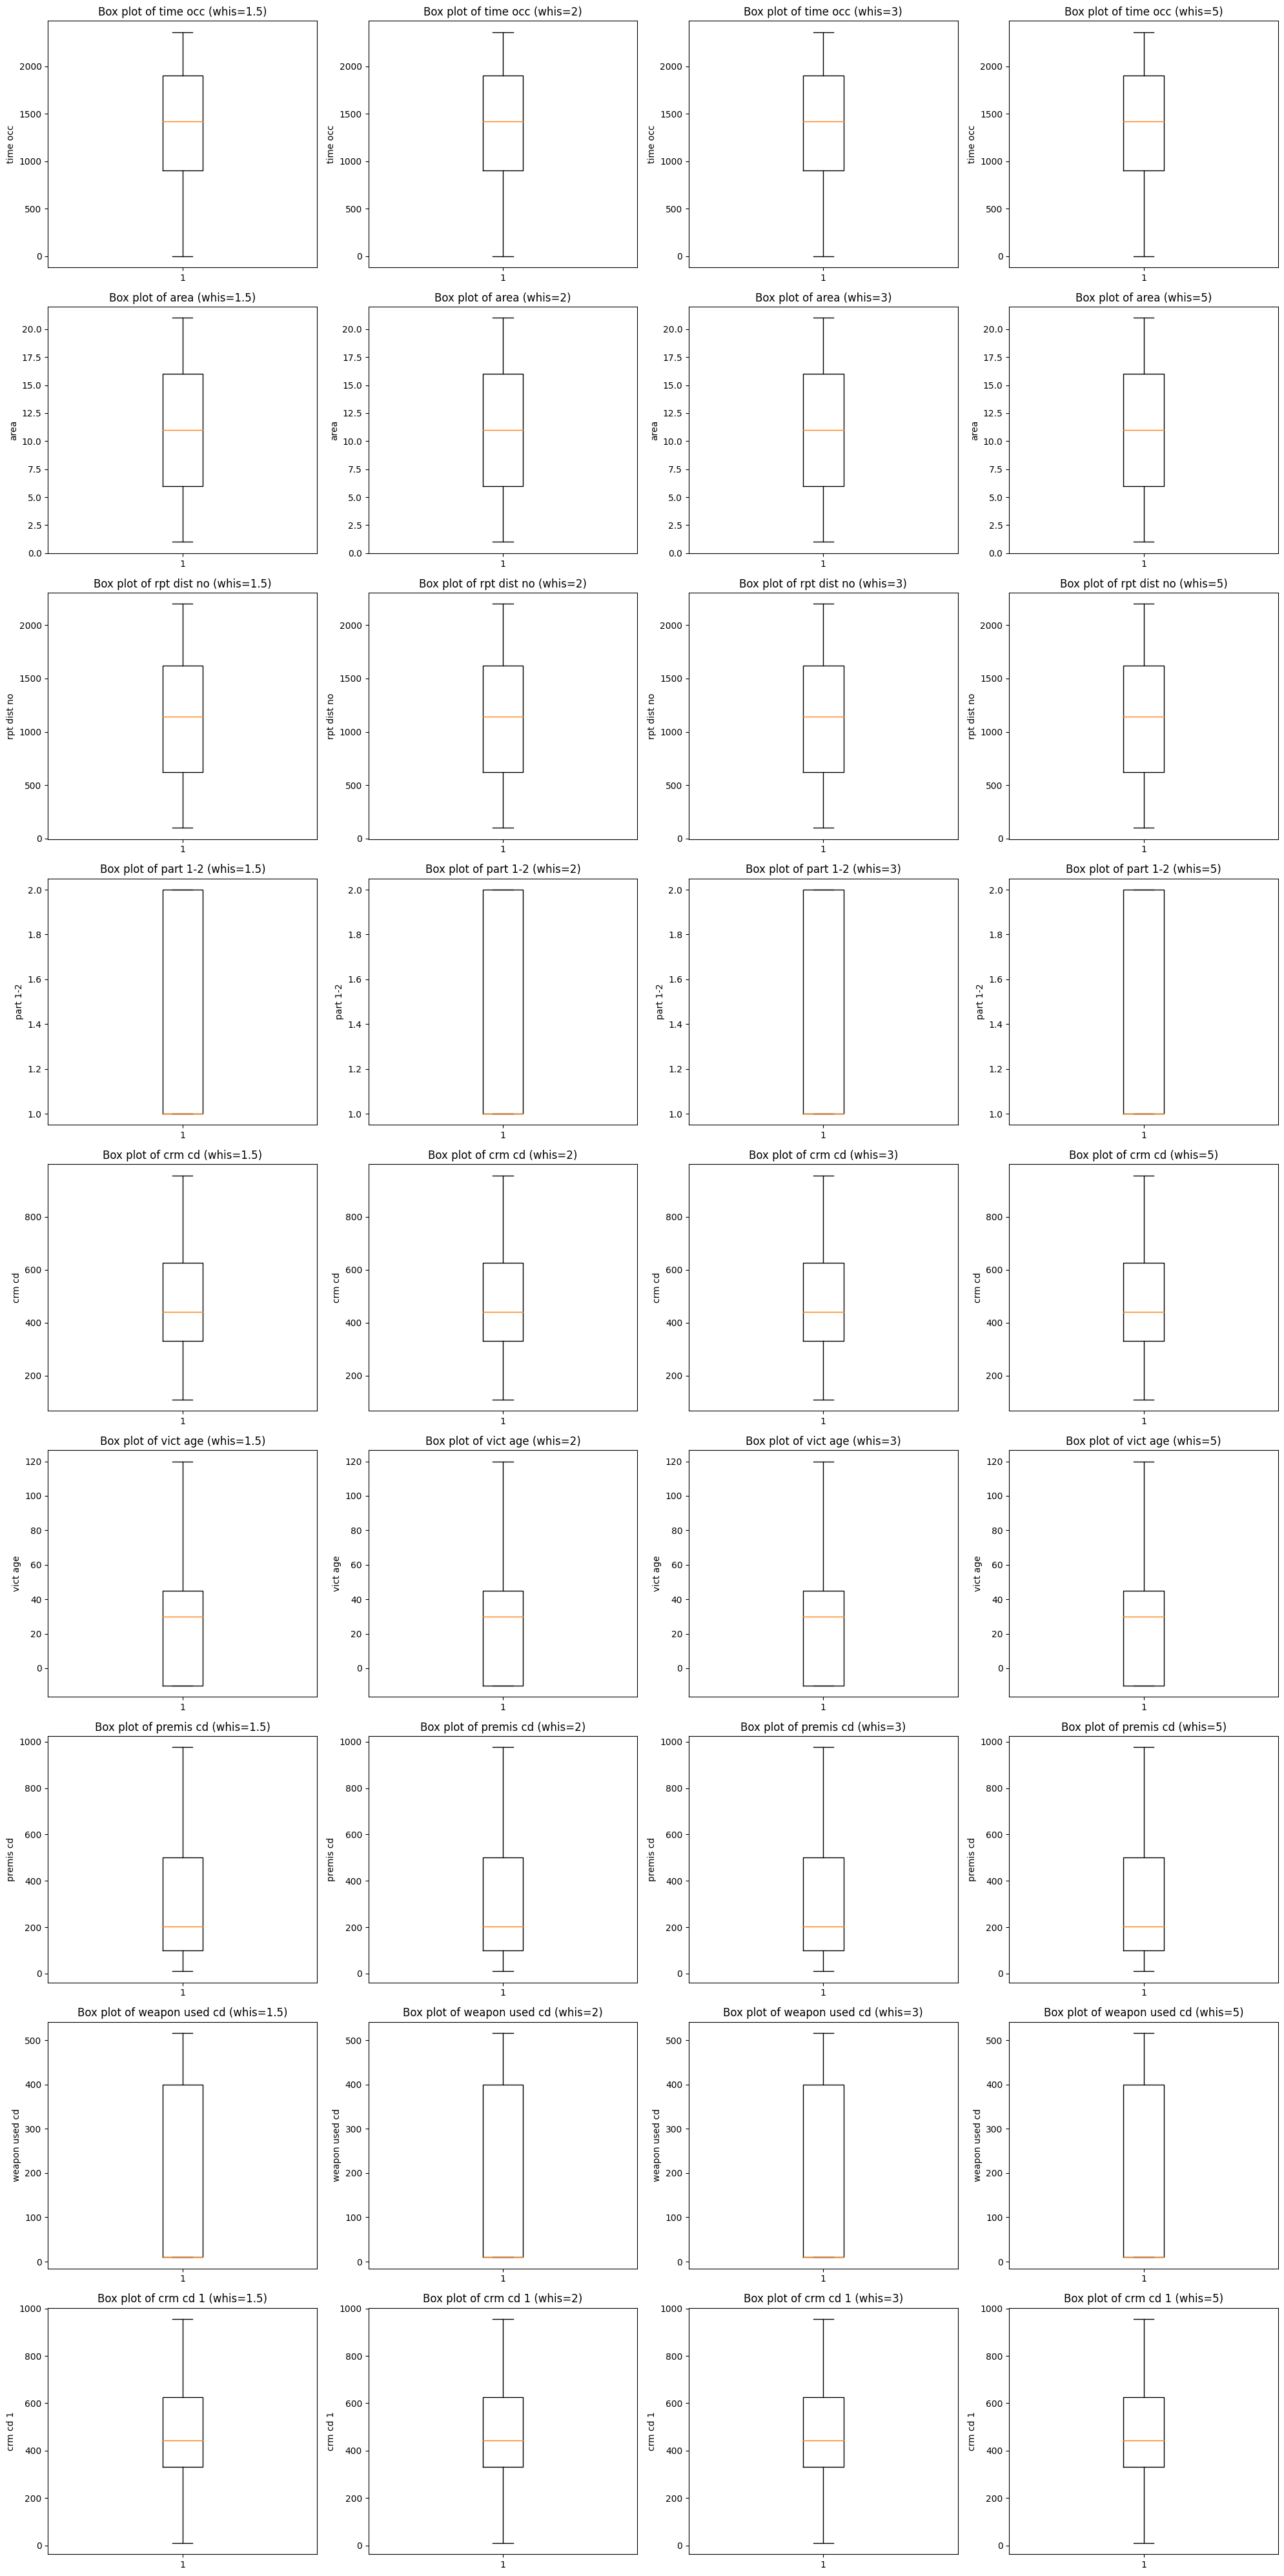

In [467]:
# Dynamically select columns of type 'int64' and 'float64'
numerical_cols = crime_la.select_dtypes(include=['int64', 'float64']).columns

# Whisker values to test
whis_values = [1.5, 2, 3, 5]

# Create figure and axes for the subplots
fig, axes = plt.subplots(nrows=len(numerical_cols), ncols=len(whis_values), figsize=(20, 40))

for i, col in enumerate(numerical_cols):
    for j, whis in enumerate(whis_values):
        axes[i, j].boxplot(crime_la[col], whis=whis)  # Set whis value here
        axes[i, j].set_title(f"Box plot of {col} (whis={whis})")
        axes[i, j].set_ylabel(col)

plt.tight_layout()
plt.show()

In a quick review, looks like there is no outliers

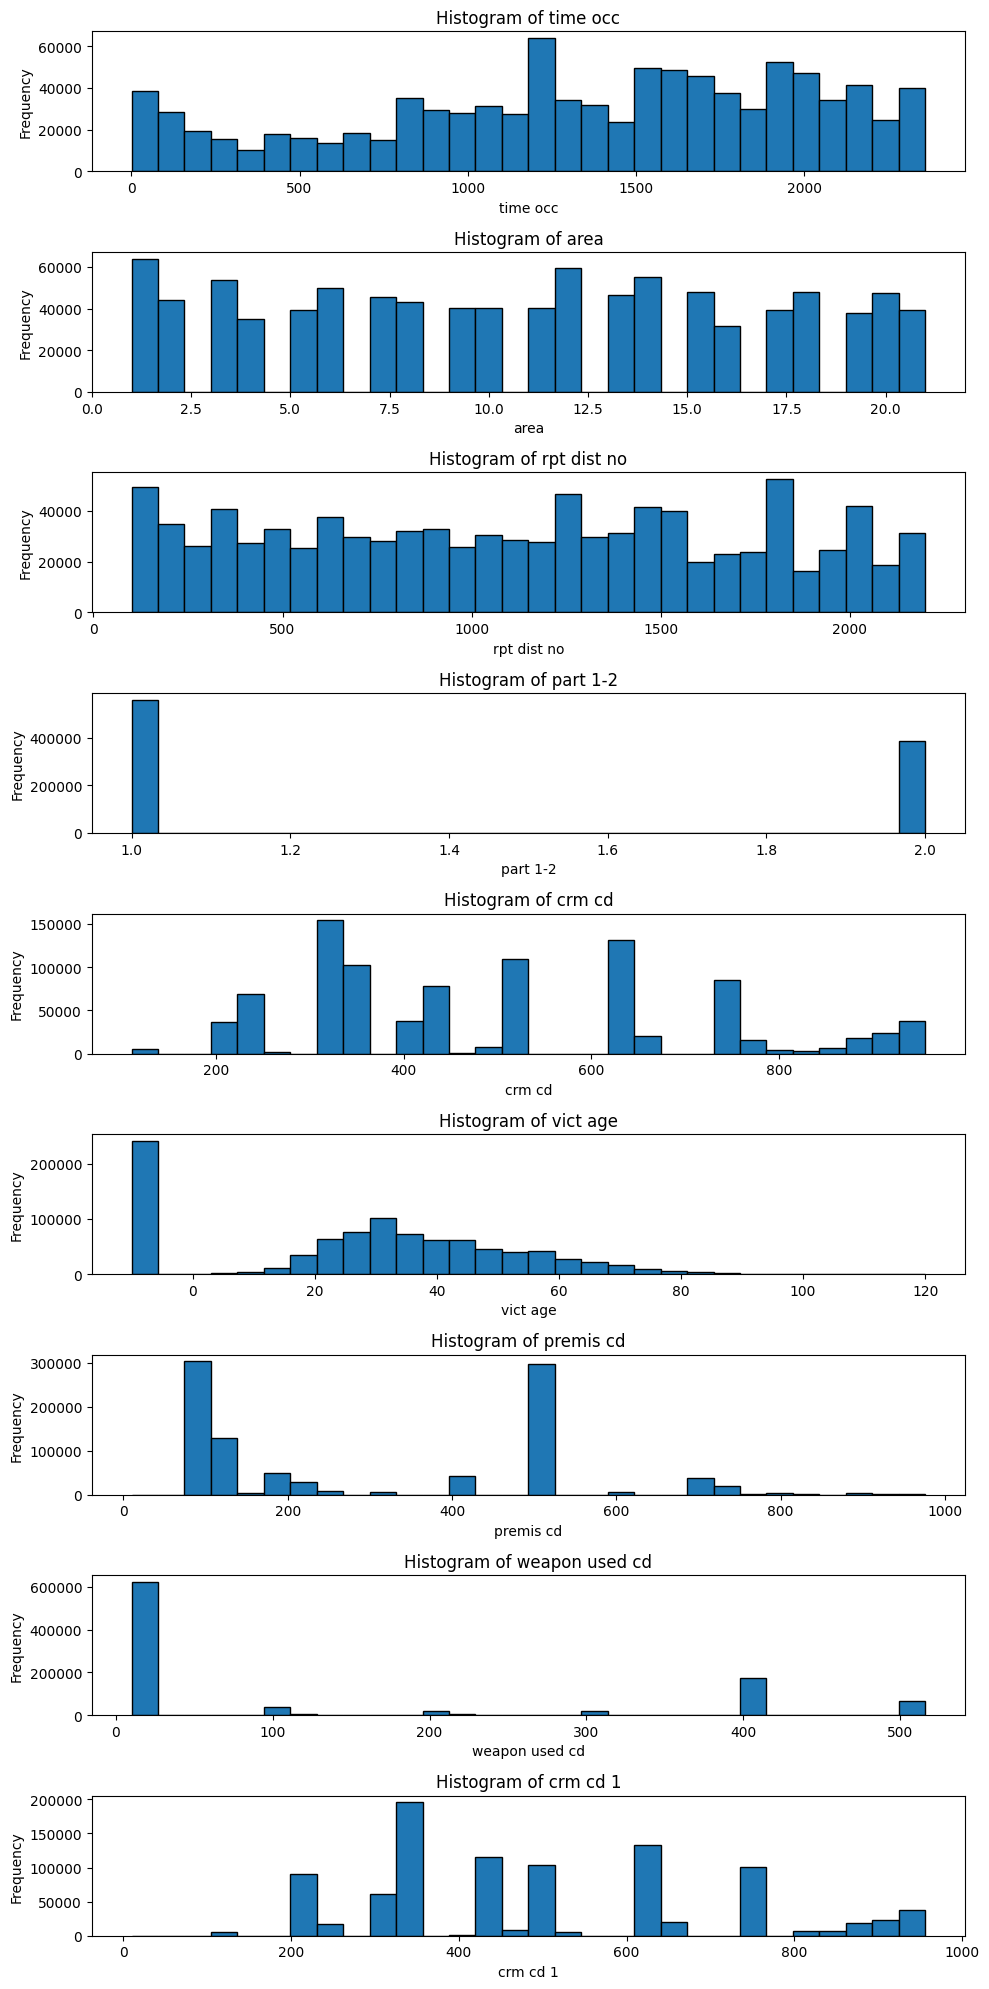

In [468]:
# Create a figure and axis for the plots
fig, axes = plt.subplots(nrows=len(numerical_cols), figsize=(10, 20))

# Generate a histogram for each numerical column
for i, col in enumerate(numerical_cols):
    axes[i].hist(crime_la[col], bins=30, edgecolor='black')
    axes[i].set_title(f"Histogram of {col}")
    axes[i].set_ylabel('Frequency')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

### Statistical methods to detect outliers


#### z-score


In [469]:

# Loop through each numerical column
for col in numerical_cols:
    print(f"\nAnalyzing column: {col}")
    z_scores = zscore(crime_la[col])

    for threshold in range(1, 5):
        outliers = np.where(z_scores > threshold)
        num_outliers = len(outliers[0])

        print(f"Threshold: {threshold}")
        print(f"Indices of outliers: {outliers}")
        print(f"Number of outliers: {num_outliers}")


Analyzing column: time occ
Threshold: 1
Indices of outliers: (array([     0,      3,      5, ..., 947766, 947770, 947774]),)
Number of outliers: 187120
Threshold: 2
Indices of outliers: (array([], dtype=int64),)
Number of outliers: 0
Threshold: 3
Indices of outliers: (array([], dtype=int64),)
Number of outliers: 0
Threshold: 4
Indices of outliers: (array([], dtype=int64),)
Number of outliers: 0

Analyzing column: area
Threshold: 1
Indices of outliers: (array([     5,      9,     10, ..., 947765, 947770, 947771]),)
Number of outliers: 211710
Threshold: 2
Indices of outliers: (array([], dtype=int64),)
Number of outliers: 0
Threshold: 3
Indices of outliers: (array([], dtype=int64),)
Number of outliers: 0
Threshold: 4
Indices of outliers: (array([], dtype=int64),)
Number of outliers: 0

Analyzing column: rpt dist no
Threshold: 1
Indices of outliers: (array([     5,      9,     10, ..., 947765, 947770, 947771]),)
Number of outliers: 203807
Threshold: 2
Indices of outliers: (array([], dtype

Based on the **z-score analysis** for numerical columns in the dataset, significant numbers of outliers are detected at a threshold of 1, indicating high variability in the data. However, at higher thresholds (2, 3, and 4), the number of outliers drops dramatically, with some columns like `time occ`, `area`, `rpt dist no`, and `part 1-2` showing no outliers at thresholds beyond 1. Columns such as **`vict age`, `premis cd`, and `weapon used cd`** exhibit **persistent outliers** at threshold 2, and a few even at threshold 3, suggesting the presence of extreme values that might warrant further investigation. Adjusting the outlier detection threshold to 2 may provide a balanced approach for identifying significant deviations without being too lenient.

Probably the outliers on **vict age, premis cd, and weapon used cd**, are most likely because **we replaced the missing values with 10, -10**

#### Tukey

In [470]:
# Function to detect outliers using Tukey's method
def detect_outliers_tukey(column, thresholds):
    q75, q25 = np.percentile(column, [75, 25])
    iqr = q75 - q25

    results = []
    for threshold in thresholds:
        min_val = q25 - (iqr * threshold)
        max_val = q75 + (iqr * threshold)
        outliers = np.where((column > max_val) | (column < min_val))
        num_outliers = len(outliers[0])
        results.append((threshold, num_outliers, outliers))
    return results

# Threshold values to check
thresholds = np.arange(1, 5, 0.5)

# Loop through each numerical column and detect outliers
for col in numerical_cols:
    print(f"\nAnalyzing column: {col}")
    results = detect_outliers_tukey(crime_la[col], thresholds)

    for threshold, num_outliers, outliers in results:
        print(f"Threshold: {threshold}")
        print(f"Number of outliers: {num_outliers}")
        print(f"Indices of outliers: {outliers}")


Analyzing column: time occ
Threshold: 1.0
Number of outliers: 0
Indices of outliers: (array([], dtype=int64),)
Threshold: 1.5
Number of outliers: 0
Indices of outliers: (array([], dtype=int64),)
Threshold: 2.0
Number of outliers: 0
Indices of outliers: (array([], dtype=int64),)
Threshold: 2.5
Number of outliers: 0
Indices of outliers: (array([], dtype=int64),)
Threshold: 3.0
Number of outliers: 0
Indices of outliers: (array([], dtype=int64),)
Threshold: 3.5
Number of outliers: 0
Indices of outliers: (array([], dtype=int64),)
Threshold: 4.0
Number of outliers: 0
Indices of outliers: (array([], dtype=int64),)
Threshold: 4.5
Number of outliers: 0
Indices of outliers: (array([], dtype=int64),)

Analyzing column: area
Threshold: 1.0
Number of outliers: 0
Indices of outliers: (array([], dtype=int64),)
Threshold: 1.5
Number of outliers: 0
Indices of outliers: (array([], dtype=int64),)
Threshold: 2.0
Number of outliers: 0
Indices of outliers: (array([], dtype=int64),)
Threshold: 2.5
Number of

The Tukey's method analysis reveals that **most columns in the dataset do not have significant outliers** at various thresholds (1.0 to 4.5). Specifically, `time occ`, `area`, `rpt dist no`, `part 1-2`, and `weapon used cd` show no outliers across all thresholds. **Notable exceptions include `crm cd`, `premis cd`, and `crm cd 1`**, which show outliers at a threshold of 1.0 but none at higher thresholds, indicating that these outliers are relatively minor deviations from the norm. `vict age` has a single outlier at threshold 1.0, and `crm cd` shows 38,332 outliers at threshold 1.0, highlighting a need for further inspection of these specific columns for data quality or variability issues.

BEFORE TREATING OUTLIERS DO WE EVEN NEED THIS COLUMNS?


In [471]:
crime_la.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947775 entries, 0 to 947774
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date rptd       947775 non-null  object 
 1   date occ        947775 non-null  object 
 2   time occ        947775 non-null  int64  
 3   area            947775 non-null  int64  
 4   area name       947775 non-null  object 
 5   rpt dist no     947775 non-null  int64  
 6   part 1-2        947775 non-null  int64  
 7   crm cd          947775 non-null  int64  
 8   crm cd desc     947775 non-null  object 
 9   vict age        947775 non-null  int64  
 10  vict sex        947775 non-null  object 
 11  vict descent    947775 non-null  object 
 12  premis cd       947775 non-null  float64
 13  premis desc     947775 non-null  object 
 14  weapon used cd  947775 non-null  float64
 15  weapon desc     947775 non-null  object 
 16  status          947775 non-null  object 
 17  status des

In [472]:
# almost the same to crm cd 1
crime_la['crm cd']

0         510
1         330
2         480
3         343
4         354
         ... 
947770    420
947771    624
947772    745
947773    230
947774    740
Name: crm cd, Length: 947775, dtype: int64

In [473]:
crime_la['premis cd']

0         101.0
1         128.0
2         502.0
3         405.0
4         102.0
          ...  
947770    104.0
947771    124.0
947772    503.0
947773    102.0
947774    122.0
Name: premis cd, Length: 947775, dtype: float64

Because these columns are codes that we dont know we will drop them

In [474]:
# Drop the specified columns
columns_to_drop = ['crm cd', 'premis cd', 'crm cd 1']
crime_la = crime_la.drop(columns=columns_to_drop)

In [475]:
# Drop the specified column we dont have info what this means
columns_to_drop = ['part 1-2']
crime_la = crime_la.drop(columns=columns_to_drop)

In [476]:
# Verify the columns have been dropped
crime_la.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947775 entries, 0 to 947774
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date rptd       947775 non-null  object 
 1   date occ        947775 non-null  object 
 2   time occ        947775 non-null  int64  
 3   area            947775 non-null  int64  
 4   area name       947775 non-null  object 
 5   rpt dist no     947775 non-null  int64  
 6   crm cd desc     947775 non-null  object 
 7   vict age        947775 non-null  int64  
 8   vict sex        947775 non-null  object 
 9   vict descent    947775 non-null  object 
 10  premis desc     947775 non-null  object 
 11  weapon used cd  947775 non-null  float64
 12  weapon desc     947775 non-null  object 
 13  status          947775 non-null  object 
 14  status desc     947775 non-null  object 
 15  location        947775 non-null  object 
 16  cross street    947775 non-null  object 
dtypes: float64

Given that the outliers in **vict age and weapon used cd** likely stem from the replacement of missing values with specific placeholders (10, -10), and the **goal is to predict crime type (crm cd desc)**, the best approach may be to transform these outliers:


**•	Capping:** Replace the extreme values (e.g., 10, -10) with more reasonable maximum and minimum values observed in your dataset for those columns.


•	**Transformation:** Apply transformations like logarithmic or square root transformation to reduce the skewness caused by outliers.

In [477]:
# Get basic statistics for numerical columns
print(crime_la.describe())

# Get statistics for categorical columns
print(crime_la.describe(include=['object']))

            time occ           area    rpt dist no       vict age  \
count  947775.000000  947775.000000  947775.000000  947775.000000   
mean     1338.244472      10.721589    1118.598537      26.911503   
std       652.376486       6.099632     610.008703      25.468198   
min         1.000000       1.000000     101.000000     -10.000000   
25%       900.000000       6.000000     622.000000     -10.000000   
50%      1420.000000      11.000000    1142.000000      30.000000   
75%      1900.000000      16.000000    1619.000000      45.000000   
max      2359.000000      21.000000    2199.000000     120.000000   

       weapon used cd  
count   947775.000000  
mean       131.169166  
std        182.782828  
min         10.000000  
25%         10.000000  
50%         10.000000  
75%        400.000000  
max        516.000000  
                     date rptd                date occ area name  \
count                   947775                  947775    947775   
unique                    

In [478]:
# Filter out the placeholder values for 'vict age' and 'weapon used cd' -10 and 10
filtered_crime_la = crime_la[(crime_la['vict age'] != -10)]
filtered_crime_la = filtered_crime_la[filtered_crime_la['weapon used cd'] != 10]

# Get basic statistics for 'vict age' and 'weapon used cd' without the placeholders
print(filtered_crime_la[['vict age', 'weapon used cd']].describe())

            vict age  weapon used cd
count  298641.000000   298641.000000
mean       37.459702      365.720621
std        15.453271      120.573357
min         2.000000      101.000000
25%        26.000000      312.000000
50%        35.000000      400.000000
75%        48.000000      400.000000
max       120.000000      516.000000


CAPPING

In [479]:
# now 1 for vict age is unknown and 100 FOR WEAPON USED is unknown BECUASE OULIERS
# Replace placeholder values with more reasonable values
crime_la['vict age'] = crime_la['vict age'].replace(-10, 1)
crime_la['weapon used cd'] = crime_la['weapon used cd'].replace(10, 100)

# Verify the changes
print(crime_la[['vict age', 'weapon used cd']].describe())

            vict age  weapon used cd
count  947775.000000   947775.000000
mean       29.719502      190.339887
std        21.548483      144.548974
min         1.000000      100.000000
25%         1.000000      100.000000
50%        30.000000      100.000000
75%        45.000000      400.000000
max       120.000000      516.000000


# Data Exploration (EDA)

## Univariate

In [480]:
crime_la.head()

,date rptd,date occ,time occ,area,area name,rpt dist no,crm cd desc,vict age,vict sex,vict descent,premis desc,weapon used cd,weapon desc,status,status desc,location,cross street
0,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,VEHICLE - STOLEN,1,M,O,STREET,100.0,X,AA,Adult Arrest,1900 S LONGWOOD AV,X
1,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,BURGLARY FROM VEHICLE,47,M,O,BUS STOP/LAYOVER (ALSO QUERY 124),100.0,X,IC,Invest Cont,1000 S FLOWER ST,X
2,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,BIKE - STOLEN,19,X,X,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",100.0,X,IC,Invest Cont,1400 W 37TH ST,X
3,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,O,CLOTHING STORE,100.0,X,IC,Invest Cont,14000 RIVERSIDE DR,X
4,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,THEFT OF IDENTITY,28,M,H,SIDEWALK,100.0,X,IC,Invest Cont,1900 TRANSIENT,X


We will use only the date of the ocurrence not the date reported

In [481]:
# Drop the column
crime_la = crime_la.drop(columns=['date rptd'])

In [482]:
# Remove time component and keep only date
crime_la['date occ'] = pd.to_datetime(crime_la['date occ']).dt.date

# Convert back to datetime to use dt accessor
crime_la['date occ'] = pd.to_datetime(crime_la['date occ'])

In [483]:
# Extract year, month, and day into separate columns
crime_la['year'] = crime_la['date occ'].dt.year
crime_la['month'] = crime_la['date occ'].dt.month
crime_la['day'] = crime_la['date occ'].dt.day

# Verify the changes
print(crime_la[['date occ', 'year', 'month', 'day']].head())

    date occ  year  month  day
0 2020-03-01  2020      3    1
1 2020-02-08  2020      2    8
2 2020-11-04  2020     11    4
3 2020-03-10  2020      3   10
4 2020-08-17  2020      8   17


In [484]:
crime_la

,date occ,time occ,area,area name,rpt dist no,crm cd desc,vict age,vict sex,vict descent,premis desc,weapon used cd,weapon desc,status,status desc,location,cross street,year,month,day
0,2020-03-01,2130,7,Wilshire,784,VEHICLE - STOLEN,1,M,O,STREET,100.0,X,AA,Adult Arrest,1900 S LONGWOOD AV,X,2020,3,1
1,2020-02-08,1800,1,Central,182,BURGLARY FROM VEHICLE,47,M,O,BUS STOP/LAYOVER (ALSO QUERY 124),100.0,X,IC,Invest Cont,1000 S FLOWER ST,X,2020,2,8
2,2020-11-04,1700,3,Southwest,356,BIKE - STOLEN,19,X,X,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",100.0,X,IC,Invest Cont,1400 W 37TH ST,X,2020,11,4
3,2020-03-10,2037,9,Van Nuys,964,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,O,CLOTHING STORE,100.0,X,IC,Invest Cont,14000 RIVERSIDE DR,X,2020,3,10
4,2020-08-17,1200,6,Hollywood,666,THEFT OF IDENTITY,28,M,H,SIDEWALK,100.0,X,IC,Invest Cont,1900 TRANSIENT,X,2020,8,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947770,2024-02-17,2330,21,Topanga,2103,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),44,F,O,DRIVEWAY,100.0,X,IC,Invest Cont,22700 NAPA ST,X,2024,2,17
947771,2024-01-16,1510,20,Olympic,2013,BATTERY - SIMPLE ASSAULT,80,F,O,BUS STOP,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,HOBART BL,3RD ST,2024,1,16
947772,2024-01-15,100,1,Central,101,VANDALISM - MISDEAMEANOR ($399 OR UNDER),1,X,X,HOTEL,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,1300 W SUNSET BL,X,2024,1,15
947773,2024-04-24,1500,3,Southwest,358,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",70,F,W,SIDEWALK,308.0,STICK,IC,Invest Cont,FLOWER ST,JEFFERSON BL,2024,4,24


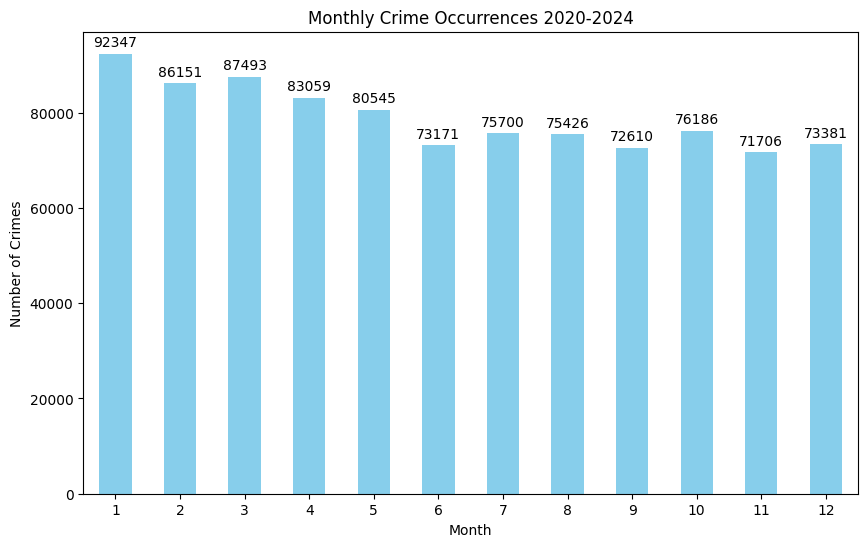

In [485]:
# Group by month and count occurrences
monthly_counts = crime_la['month'].value_counts().sort_index()

# Plot the monthly crime counts
plt.figure(figsize=(10, 6))
bars = monthly_counts.plot(kind='bar', color='skyblue')

# Annotate bars with counts
for bar in bars.containers[0]:
    bars.annotate(
        format(bar.get_height(), '.0f'),
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha='center', va='center',
        xytext=(0, 8),
        textcoords='offset points'
    )

plt.title('Monthly Crime Occurrences 2020-2024')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=0)
plt.show()

The bar plot illustrates the number of **crimes per month from 2020 to 2024**. It shows a relatively **consistent distribution of crimes across the months**, with a slight **peak in January** and a gradual decrease towards the middle of the year. The number of **crime**s ranges from around **60,000 to 90,000 each month**, with January having the highest occurrence and a noticeable dip in the middle months like June and July. The consistent height of the bars indicates that crime occurrences are fairly evenly distributed throughout the years, without extreme fluctuations.

In [486]:
# Group by year and count occurrences
yearly_counts = crime_la['year'].value_counts().sort_index()

# Calculate the average number of crimes per year
average_crimes_per_year = yearly_counts.mean()

# Print the average number of crimes per year
print(f"Average number of crimes per year: {average_crimes_per_year:.2f}")

# Optional: Print the yearly counts to verify
print(yearly_counts)

Average number of crimes per year: 189555.00
year
2020    199706
2021    209716
2022    234996
2023    231726
2024     71631
Name: count, dtype: int64


2024 is significally different because we have info until may

## Visuals per column
time occ

area

vict age

weapon used cd

In [487]:
# Dynamically select columns of type 'int64' and 'float64'
numerical_cols = crime_la.select_dtypes(include=['int64', 'float64']).columns
print(numerical_cols)

Index(['time occ', 'area', 'rpt dist no', 'vict age', 'weapon used cd'], dtype='object')


rpt dist no is a code that is not relevant for the study

In [488]:
# Drop the 'rpt dist no' column
crime_la = crime_la.drop(columns=['rpt dist no'])

### time occ

Categorical variable but some stats still work

In [489]:
# stats
crime_la["time occ"].describe()

count    947775.000000
mean       1338.244472
std         652.376486
min           1.000000
25%         900.000000
50%        1420.000000
75%        1900.000000
max        2359.000000
Name: time occ, dtype: float64

The `time occ` column, representing crime occurrence times in a 24-hour format, has a total of 947,775 records with no missing values. The **average crime time is approximately 1:38 PM**, with a high variability (standard deviation of 652 minutes) indicating that **crimes occur at various times throughout the day**. The earliest crime time recorded is just after midnight at 12:01 AM, while the latest is just before midnight at 11:59 PM. The distribution shows that **25% of crimes occur by 9:00 AM, 50% by 2:20 PM, and 75% by 7:00 PM**, suggesting an **increasing trend in crime occurrences as the day progresses**. Overall, crimes are distributed across the entire 24-hour period, highlighting the diverse timings of crime events.


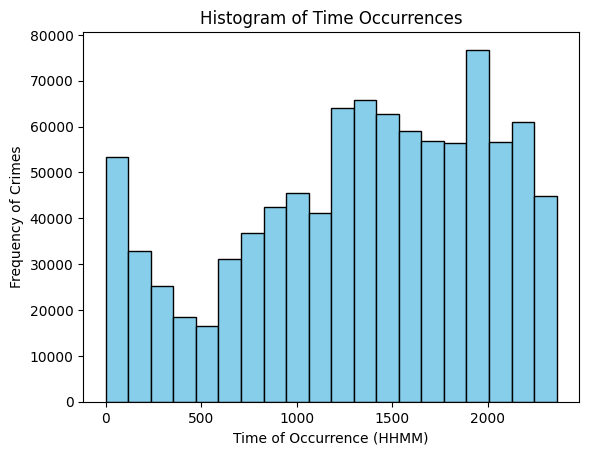

In [490]:
# Plot the histogram
plt.hist(crime_la["time occ"], bins=20, color='skyblue', edgecolor='black')
plt.title("Histogram of Time Occurrences")
plt.xlabel("Time of Occurrence (HHMM)")
plt.ylabel("Frequency of Crimes")
plt.show()

The histogram of crime occurrences by time shows a **varied distribution throughout the da**y. There are **noticeable peaks at midnight** (0000) and **late evening** (around 2000-2200), indicating **higher crime frequencies during these times**. The frequency **decreases during the early morning hours** (around 0200-0600), then steadily **increases from morning through the afternoon**, peaking again in the late evening. This pattern suggests that **crimes are more likely to occur late at night and in the evening**, with a significant dip during early morning hours, likely corresponding to times when fewer people are active. The histogram reveals a **bimodal distribution** with two prominent peaks, highlighting specific times of day with higher crime activities.

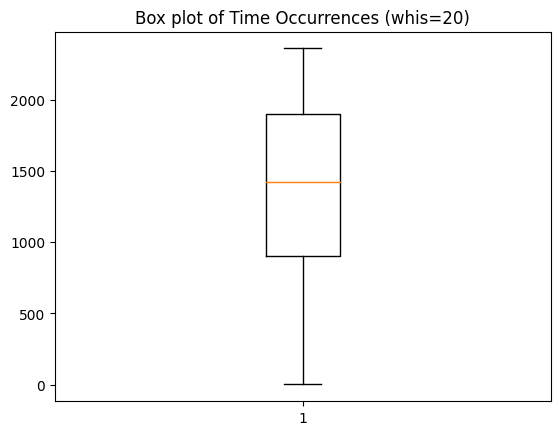

In [491]:
plt.boxplot(crime_la["time occ"], whis=20)
plt.title("Box plot of Time Occurrences (whis=20)")
plt.show()

The box plot of crime occurrence times, with whiskers set to 20, shows a distribution of crimes throughout the 24-hour day. **The median crime time is around 1400 (2:00 PM)**, indicating that **half of the crimes occur before this time and half after**. The interquartile range (IQR), which is the range between the first quartile (Q1) and the third quartile (Q3), spans from about **900 (9:00 AM) to approximately 1900 (7:00 PM)**, suggesting that the middle **50% of crimes occur during these hours**. The whiskers extend to the minimum and maximum times, which are around 0000 (midnight) and 2359 (just before midnight), indicating that crimes are reported throughout the entire day.

### area

In [492]:
# Get unique values in 'area' column
unique_areas = crime_la['area'].unique()
print(unique_areas)

[ 7  1  3  9  6 18 13 19  2 10  8 20  4 21 11 12 14 15  5 16 17]


**Categorical variable** so stats irrelevant

https://lapdonlinestrgeacc.blob.core.usgovcloudapi.net/lapdonlinemedia/2021/09/citywide.pdf

In [493]:
# found the code area meanings
# Dictionary to map area codes to their respective text
area_mapping = {
    1: 'CENTRAL', 2: 'RAMPART', 3: 'SOUTHWEST', 4: 'HOLLENBECK', 5: 'HARBOR',
    6: 'HOLLYWOOD', 7: 'WILSHIRE', 8: 'WEST LA', 9: 'VAN NUYS', 10: 'WEST VALLEY',
    11: 'NORTHEAST', 12: '77TH', 13: 'NEWTON', 14: 'PACIFIC', 15: 'NORTH HOLLYWOOD',
    16: 'FOOTHILL', 17: 'DEVONSHIRE', 18: 'SOUTHEAST', 19: 'MISSION', 20: 'OLYMPIC',
    21: 'TOPANGA'
}

# Replace area codes with their respective text
crime_la['area name'] = crime_la['area'].map(area_mapping)

# Verify the changes
print(crime_la[['area', 'area name']].head())

   area  area name
0     7   WILSHIRE
1     1    CENTRAL
2     3  SOUTHWEST
3     9   VAN NUYS
4     6  HOLLYWOOD


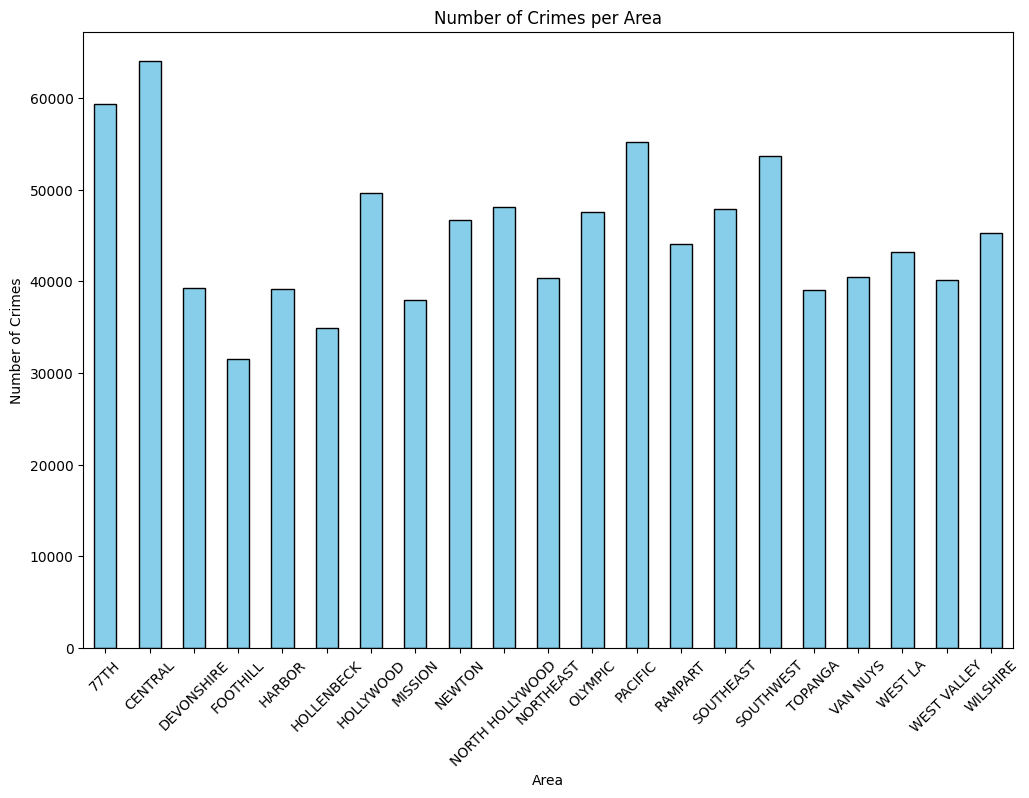

In [494]:
# Group by 'area name' and count occurrences
area_counts = crime_la['area name'].value_counts().sort_index()

# Plot the counts per area
plt.figure(figsize=(12, 8))
area_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Crimes per Area')
plt.xlabel('Area')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()

The **"77th" and "Central" areas show notably high crime rates**, suggesting a need for focused crime prevention strategies in these areas. Other areas such as **"Foothill" and "Harbor" display relatively lower crime rates**. Overall, the chart highlights significant variation in crime rates across different areas, which could be critical for law enforcement and community planners in prioritizing and tailoring their safety measures.

In [495]:
# Drop the 'area' column
crime_la = crime_la.drop(columns=['area'])

### vict age

In [496]:
# the null values were 1 so we will omit them
# Filter out the placeholder values for 'vict age'
filtered_vict_age = crime_la[crime_la['vict age'] != 1]['vict age']

# Get basic statistics for 'vict age' without the placeholders
vict_age_stats = filtered_vict_age.describe()
vict_age_stats

count    705834.000000
mean         39.563778
std          15.616230
min           2.000000
25%          28.000000
50%          37.000000
75%          50.000000
max         120.000000
Name: vict age, dtype: float64

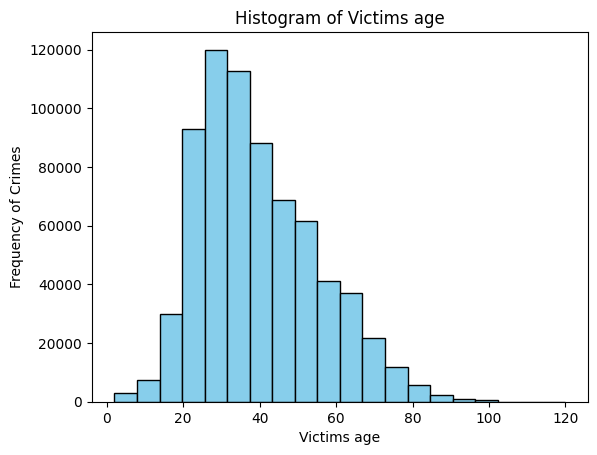

In [497]:
# Plot the histogram
plt.hist(filtered_vict_age, bins=20, color='skyblue', edgecolor='black')
plt.title("Histogram of Victims age")
plt.xlabel("Victims age")
plt.ylabel("Frequency of Crimes")
plt.show()

The **average age of victims is approximately 40** years, with a standard deviation of 15.62 years, suggesting a **moderate spread around the mean**. **The minimum age recorded is 2 years, and the maximum is 120 years.** The data is distributed such that **25% of the victims are aged 28 or younger**, **50% (the median) are 37 years or younger**, and **75% are 50 years or younger**. This indicates that most victims fall within the age range of young to middle-aged adults.

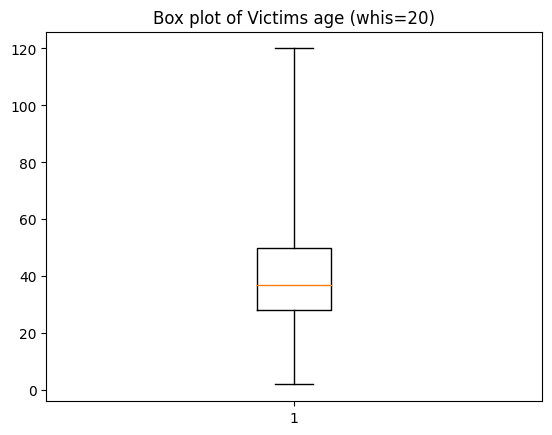

In [498]:
plt.boxplot(filtered_vict_age, whis=20)
plt.title("Box plot of Victims age (whis=20)")
plt.show()

The box plot of victim ages, with whiskers set to 20, shows the central tendency and spread of ages among crime victims. The **median age, represented by the line within the box, is around 37 years**, indicating that **half of the victims are younger and half are older than this age.**

### weapon used cd

In [499]:
crime_la

,date occ,time occ,area name,crm cd desc,vict age,vict sex,vict descent,premis desc,weapon used cd,weapon desc,status,status desc,location,cross street,year,month,day
0,2020-03-01,2130,WILSHIRE,VEHICLE - STOLEN,1,M,O,STREET,100.0,X,AA,Adult Arrest,1900 S LONGWOOD AV,X,2020,3,1
1,2020-02-08,1800,CENTRAL,BURGLARY FROM VEHICLE,47,M,O,BUS STOP/LAYOVER (ALSO QUERY 124),100.0,X,IC,Invest Cont,1000 S FLOWER ST,X,2020,2,8
2,2020-11-04,1700,SOUTHWEST,BIKE - STOLEN,19,X,X,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",100.0,X,IC,Invest Cont,1400 W 37TH ST,X,2020,11,4
3,2020-03-10,2037,VAN NUYS,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,O,CLOTHING STORE,100.0,X,IC,Invest Cont,14000 RIVERSIDE DR,X,2020,3,10
4,2020-08-17,1200,HOLLYWOOD,THEFT OF IDENTITY,28,M,H,SIDEWALK,100.0,X,IC,Invest Cont,1900 TRANSIENT,X,2020,8,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947770,2024-02-17,2330,TOPANGA,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),44,F,O,DRIVEWAY,100.0,X,IC,Invest Cont,22700 NAPA ST,X,2024,2,17
947771,2024-01-16,1510,OLYMPIC,BATTERY - SIMPLE ASSAULT,80,F,O,BUS STOP,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,HOBART BL,3RD ST,2024,1,16
947772,2024-01-15,100,CENTRAL,VANDALISM - MISDEAMEANOR ($399 OR UNDER),1,X,X,HOTEL,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,1300 W SUNSET BL,X,2024,1,15
947773,2024-04-24,1500,SOUTHWEST,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",70,F,W,SIDEWALK,308.0,STICK,IC,Invest Cont,FLOWER ST,JEFFERSON BL,2024,4,24


weapon used cd is the code for weapon desc, so weapon used cd will be dropped

In [500]:
# Drop the column
crime_la = crime_la.drop(columns=['weapon used cd'])

In [501]:
# Drop the column wont be used for this study
crime_la = crime_la.drop(columns=['status'])

In [502]:
# Drop the column wont be used for this study
crime_la = crime_la.drop(columns=['cross street'])

In [503]:
crime_la

,date occ,time occ,area name,crm cd desc,vict age,vict sex,vict descent,premis desc,weapon desc,status desc,location,year,month,day
0,2020-03-01,2130,WILSHIRE,VEHICLE - STOLEN,1,M,O,STREET,X,Adult Arrest,1900 S LONGWOOD AV,2020,3,1
1,2020-02-08,1800,CENTRAL,BURGLARY FROM VEHICLE,47,M,O,BUS STOP/LAYOVER (ALSO QUERY 124),X,Invest Cont,1000 S FLOWER ST,2020,2,8
2,2020-11-04,1700,SOUTHWEST,BIKE - STOLEN,19,X,X,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",X,Invest Cont,1400 W 37TH ST,2020,11,4
3,2020-03-10,2037,VAN NUYS,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,O,CLOTHING STORE,X,Invest Cont,14000 RIVERSIDE DR,2020,3,10
4,2020-08-17,1200,HOLLYWOOD,THEFT OF IDENTITY,28,M,H,SIDEWALK,X,Invest Cont,1900 TRANSIENT,2020,8,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947770,2024-02-17,2330,TOPANGA,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),44,F,O,DRIVEWAY,X,Invest Cont,22700 NAPA ST,2024,2,17
947771,2024-01-16,1510,OLYMPIC,BATTERY - SIMPLE ASSAULT,80,F,O,BUS STOP,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,HOBART BL,2024,1,16
947772,2024-01-15,100,CENTRAL,VANDALISM - MISDEAMEANOR ($399 OR UNDER),1,X,X,HOTEL,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,1300 W SUNSET BL,2024,1,15
947773,2024-04-24,1500,SOUTHWEST,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",70,F,W,SIDEWALK,STICK,Invest Cont,FLOWER ST,2024,4,24


## describe()

In [504]:
crime_la.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947775 entries, 0 to 947774
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date occ      947775 non-null  datetime64[ns]
 1   time occ      947775 non-null  int64         
 2   area name     947775 non-null  object        
 3   crm cd desc   947775 non-null  object        
 4   vict age      947775 non-null  int64         
 5   vict sex      947775 non-null  object        
 6   vict descent  947775 non-null  object        
 7   premis desc   947775 non-null  object        
 8   weapon desc   947775 non-null  object        
 9   status desc   947775 non-null  object        
 10  location      947775 non-null  object        
 11  year          947775 non-null  int32         
 12  month         947775 non-null  int32         
 13  day           947775 non-null  int32         
dtypes: datetime64[ns](1), int32(3), int64(2), object(8)
memory usage: 90

In [505]:
# Descriptive statistics for all variables
crime_la.describe(include= 'all')

,date occ,time occ,area name,crm cd desc,vict age,vict sex,vict descent,premis desc,weapon desc,status desc,location,year,month,day
count,947775,947775.000000,947775,947775,947775.000000,947775,947775,947775,947775,947775,947775,947775.000000,947775.000000,947775.000000
unique,NaN,NaN,21,139,NaN,3,19,307,80,6,65757,NaN,NaN,NaN
top,NaN,NaN,CENTRAL,VEHICLE - STOLEN,NaN,M,H,STREET,X,Invest Cont,800 N ALAMEDA ST,NaN,NaN,NaN
freq,NaN,NaN,64021,102886,NaN,386845,287046,241585,623117,756556,1828,NaN,NaN,NaN
mean,2022-03-24 22:03:37.806124800,1338.244472,NaN,NaN,29.719502,NaN,NaN,NaN,NaN,NaN,NaN,2021.752958,6.245270,15.333398
min,2020-01-01 00:00:00,1.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,2020.000000,1.000000,1.000000
25%,2021-03-10 00:00:00,900.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,2021.000000,3.000000,7.000000
50%,2022-04-12 00:00:00,1420.000000,NaN,NaN,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,2022.000000,6.000000,15.000000
75%,2023-04-14 00:00:00,1900.000000,NaN,NaN,45.000000,NaN,NaN,NaN,NaN,NaN,NaN,2023.000000,9.000000,23.000000
max,2024-05-27 00:00:00,2359.000000,NaN,NaN,120.000000,NaN,NaN,NaN,NaN,NaN,NaN,2024.000000,12.000000,31.000000


The **`area name` column has 21 unique values**, with **"CENTRAL" being the most frequent area**.

The **most common crime type** (`crm cd desc`) is "**VEHICLE - STOLEN**", appearing **102,886 times**.

The **most frequent victim sex** (`vict sex`) is "M" (**male**), and the

**most common victim descendance** (`vict descent`) is "H" (**Hispanic**).

The **most frequent premise** description (`premis desc`) is "**STREET**".

The **status desc** variable shows "Invest Cont" (**Investigation Continued**) as the most frequent status.

The **most common location** recorded is "**800 N ALAMEDA ST**".

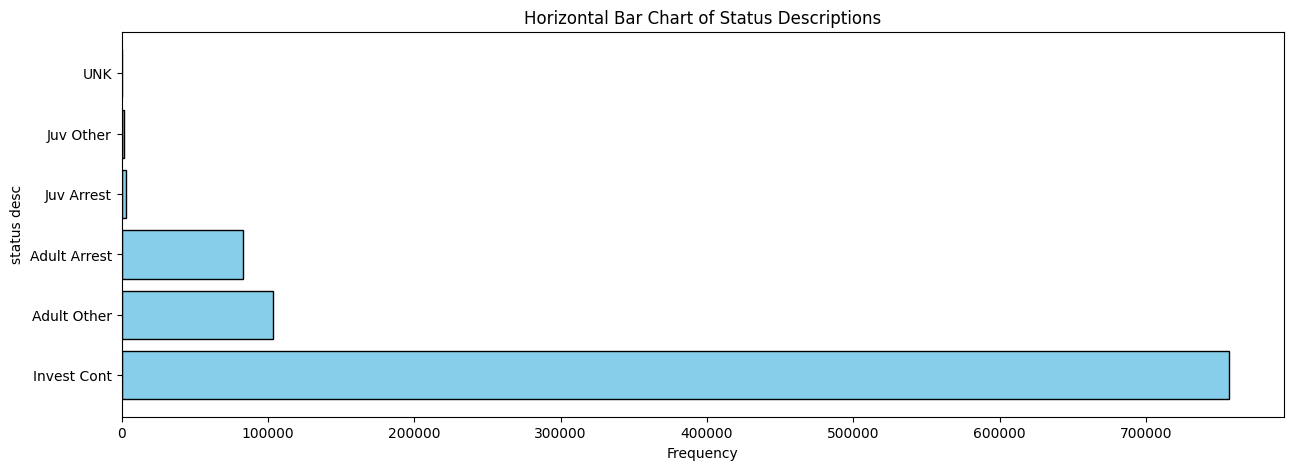

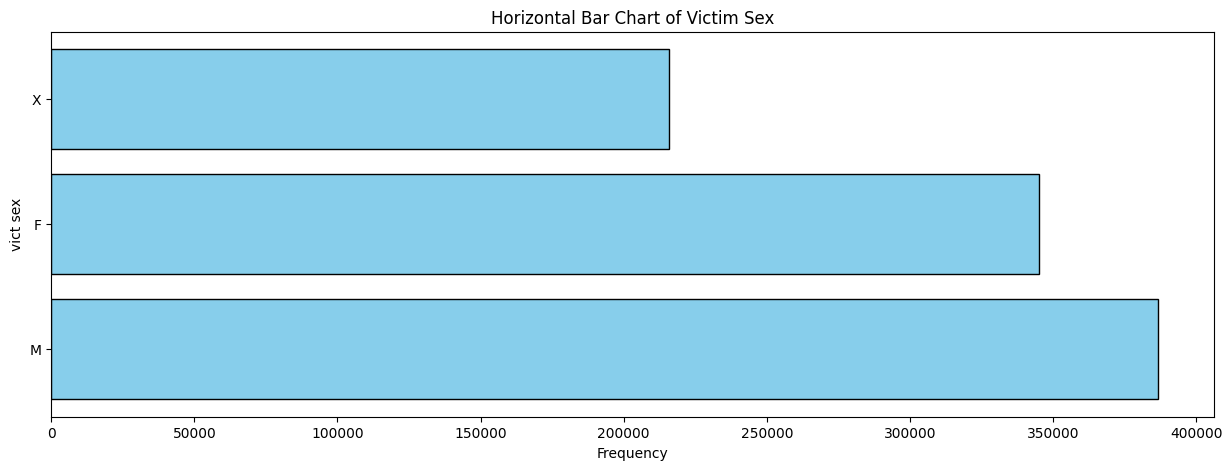

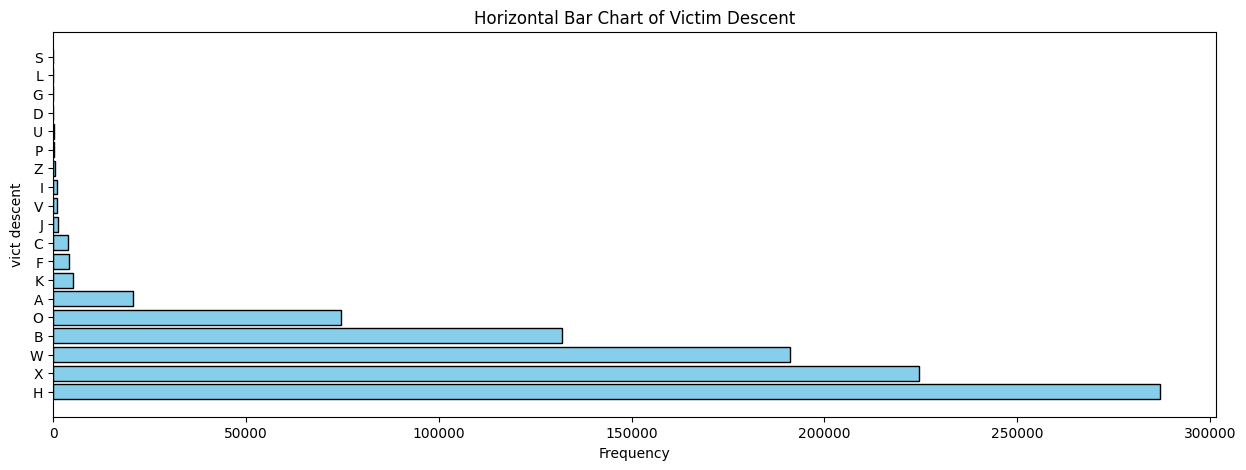

In [506]:
# Plotting function
def plot_horizontal_bar(column_name, title):
    plt.figure(figsize=(15, 5))
    counts = crime_la[column_name].value_counts()
    plt.barh(counts.index, counts, color='skyblue', edgecolor='black')
    plt.title(f'Horizontal Bar Chart of {title}')
    plt.xlabel('Frequency')
    plt.ylabel(column_name)
    plt.show()

# Plot for each specified variable
plot_horizontal_bar('status desc', 'Status Descriptions')
plot_horizontal_bar('vict sex', 'Victim Sex')
plot_horizontal_bar('vict descent', 'Victim Descent')


Descent Code: A - Other Asian B - Black C - Chinese D - Cambodian F - Filipino G - Guamanian H - Hispanic/Latin/Mexican I - American Indian/Alaskan Native J - Japanese K - Korean L - Laotian O - Other P - Pacific Islander S - Samoan U - Hawaiian V - Vietnamese W - White X - Unknown Z - Asian Indian

In [507]:
# Display unique values in the 'crm_cd_desc' column
crime_la_types = crime_la['crm cd desc'].unique()
crime_la_types


array(['VEHICLE - STOLEN', 'BURGLARY FROM VEHICLE', 'BIKE - STOLEN',
       'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)', 'THEFT OF IDENTITY',
       'BATTERY - SIMPLE ASSAULT',
       'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH',
       'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)',
       'SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ',
       'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
       'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD',
       'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',
       'CRIMINAL THREATS - NO WEAPON DISPLAYED',
       'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)',
       'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)',
       'CHILD ANNOYING (17YRS & UNDER)', 'BURGLARY', 'CONTEMPT OF COURT',
       'THEFT PLAIN - PETTY ($950 & UNDER)',
       'INTIMATE PARTNER - SIMPLE ASSAULT', 'LEWD CONDUCT',
       'THEFT PLAIN - ATTEMPT',
       'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)', 'ROBBERY',
      

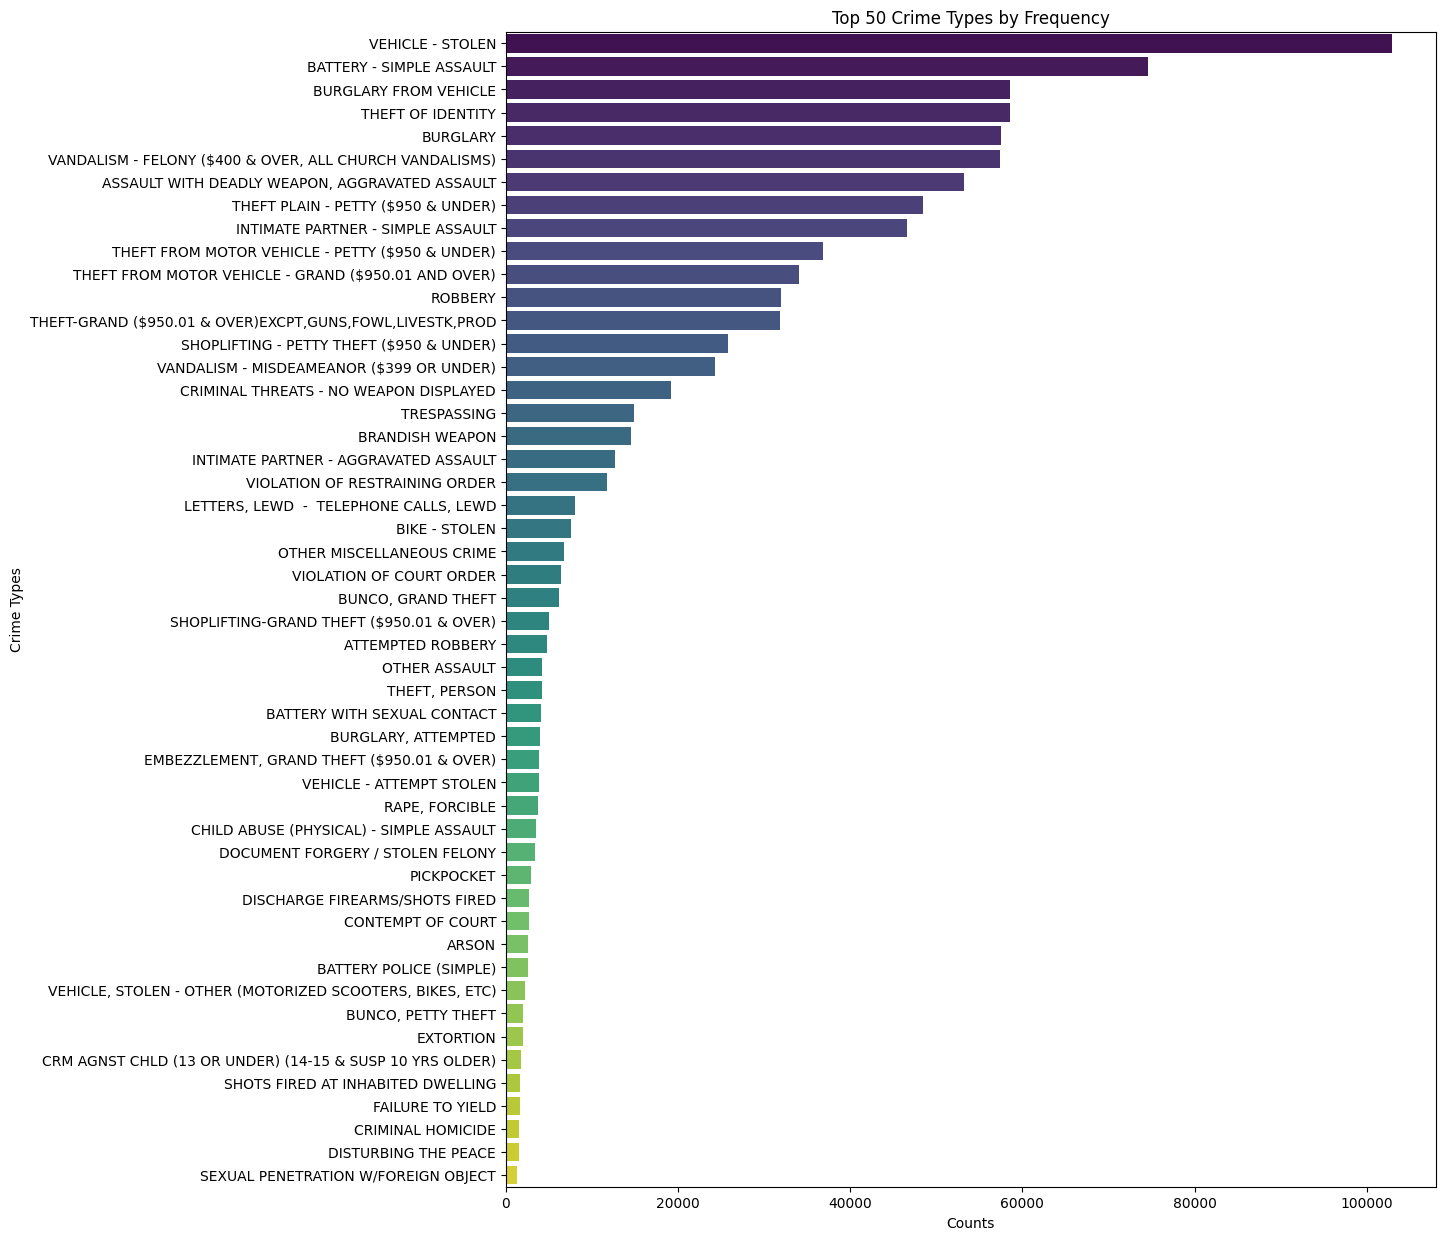

In [508]:
# Count the occurrences of each crime type
crime_type_counts = crime_la['crm cd desc'].value_counts()

# Select the top 50 crime types
top_50_crime_types = crime_type_counts.head(50)

# Create a bar plot for the top 50 crime types
plt.figure(figsize=(12, 15))
sns.barplot(x=top_50_crime_types.values, y=top_50_crime_types.index, palette='viridis')
plt.title('Top 50 Crime Types by Frequency')
plt.xlabel('Counts')
plt.ylabel('Crime Types')
plt.show()


## Bivariate analysis

In [509]:
crime_la

,date occ,time occ,area name,crm cd desc,vict age,vict sex,vict descent,premis desc,weapon desc,status desc,location,year,month,day
0,2020-03-01,2130,WILSHIRE,VEHICLE - STOLEN,1,M,O,STREET,X,Adult Arrest,1900 S LONGWOOD AV,2020,3,1
1,2020-02-08,1800,CENTRAL,BURGLARY FROM VEHICLE,47,M,O,BUS STOP/LAYOVER (ALSO QUERY 124),X,Invest Cont,1000 S FLOWER ST,2020,2,8
2,2020-11-04,1700,SOUTHWEST,BIKE - STOLEN,19,X,X,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",X,Invest Cont,1400 W 37TH ST,2020,11,4
3,2020-03-10,2037,VAN NUYS,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,O,CLOTHING STORE,X,Invest Cont,14000 RIVERSIDE DR,2020,3,10
4,2020-08-17,1200,HOLLYWOOD,THEFT OF IDENTITY,28,M,H,SIDEWALK,X,Invest Cont,1900 TRANSIENT,2020,8,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947770,2024-02-17,2330,TOPANGA,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),44,F,O,DRIVEWAY,X,Invest Cont,22700 NAPA ST,2024,2,17
947771,2024-01-16,1510,OLYMPIC,BATTERY - SIMPLE ASSAULT,80,F,O,BUS STOP,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,HOBART BL,2024,1,16
947772,2024-01-15,100,CENTRAL,VANDALISM - MISDEAMEANOR ($399 OR UNDER),1,X,X,HOTEL,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,1300 W SUNSET BL,2024,1,15
947773,2024-04-24,1500,SOUTHWEST,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",70,F,W,SIDEWALK,STICK,Invest Cont,FLOWER ST,2024,4,24


Descent Code: A - Other Asian B - Black C - Chinese D - Cambodian F - Filipino G - Guamanian H - Hispanic/Latin/Mexican I - American Indian/Alaskan Native J - Japanese K - Korean L - Laotian O - Other P - Pacific Islander S - Samoan U - Hawaiian V - Vietnamese W - White X - Unknown Z - Asian Indian

vict sex: X Unknown

In [510]:
# Create crosstab of victim sex by victim descent
count_table = pd.crosstab(crime_la["vict sex"], crime_la["vict descent"])
print(count_table)

vict descent      A      B     C   D     F   G       H    I    J     K   L  \
vict sex                                                                     
F              9951  74049  1850  37  2009  34  144287  388  670  2431  44   
M             10718  57772  1996  42  2099  34  142550  522  686  2835  21   
X                11    156    17   1    62   0     209    5    3     7   1   

vict descent      O    P   S    U    V       W       X    Z  
vict sex                                                     
F             26243  140  26   83  542   80481    1563  181  
M             48295  116  25  111  481  110429    7816  297  
X               110    1   2    5    4     261  215065    1  


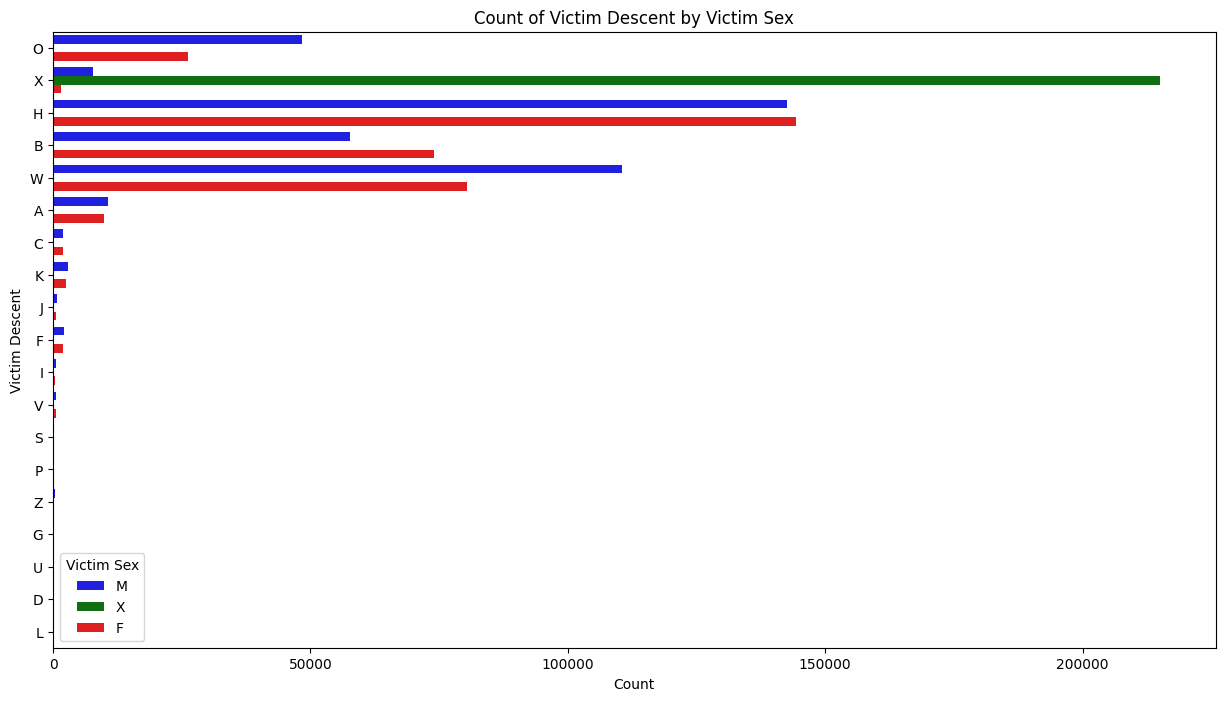

In [511]:
# Plot counts for each combination of victim sex and victim descent
plt.figure(figsize=(15, 8))
sns.countplot(y="vict descent", hue="vict sex", data=crime_la, palette={"M": "blue", "F": "red", "X": "green"})
plt.title("Count of Victim Descent by Victim Sex")
plt.xlabel("Count")
plt.ylabel("Victim Descent")
plt.legend(title="Victim Sex")
plt.show()

In [512]:
# Filter the DataFrame to exclude 'X' in vict sex
filtered_crime_la = crime_la[crime_la['vict sex'].isin(['M', 'F'])]

In [513]:
# Create crosstab of victim sex by victim descent
count_table_filtered = pd.crosstab(filtered_crime_la["vict sex"], filtered_crime_la["vict descent"])

# Perform the chi-square test
chi2_result_filtered = stats.chisquare(count_table_filtered, axis=None)

# Display the result
print(chi2_result_filtered)

Power_divergenceResult(statistic=3004635.585540285, pvalue=0.0)


The chi-square test result, Power_divergenceResult(statistic=3004635.585540285, pvalue=0.0), indicates a **very high chi-square statistic** and a **p-value of 0.0**, suggesting that the **differences in the distribution of victim sex (M/F)** **across different victim ethnicities** are **highly statistically significant**. This means that **the observed frequencies of victim sex by victim descent are not due to random chance**, and there is a **significant association between these two variables**. The extremely low p-value provides strong evidence against the null hypothesis, indicating that the differences in the distributions of victim sex across different descent categories are real and not due to sampling variability.

## Analysis



Based on the visualization and data table you provided, let's analyze the distribution of victim descent by sex in your dataset:

### Highest Counts by Ethnicity and Gender:
- **Hispanic/Latin/Mexican (H)**: This group has the highest number of victims, with counts highest for females (144287), followed by males (142550), and a much smaller number for unknown gender (2835). This indicates a significant impact on the Hispanic/Latin/Mexican community regardless of gender, with females slightly more affected than males.

### Comparative Analysis Between Genders Across Ethnicities:
- **Black (B)**: The second most represented group, with males (74049) having a higher count than females (19996). This suggests that Black males are particularly more likely to be victims compared to their female counterparts in this dataset.
- **White (W)**: Similarly, White males (80481) have a higher victim count than females (25250), reinforcing a trend where males in major ethnic groups are often more affected than females.
- **Other notable insights**:
  - **Unknown Descent (X)**: There is a high number of victims whose descent is unknown, with males (215065) significantly outnumbering females (7816). The high count for unknown males may indicate reporting or classification issues that obscure accurate ethnic identification.
  - **Asian ethnicities (A, C, J, K, Z)**: These groups show fewer victims overall compared to Hispanic/Latin/Mexican, Black, and White groups. Among Asian groups, males generally have slightly higher victim counts than females, except in the Korean (K) category where females (670) slightly outnumber males (670).
  - **Pacific Islanders (P, S, U)**: Pacific Islanders have relatively low numbers, with Samoans (S) showing a near-equal distribution between males (111) and females (110).

### General Observations:
- **Male Predominance**: Across most ethnic groups, males tend to have higher victim counts than females, which could be indicative of social or behavioral factors that put males at higher risk in various contexts.
- **Impact on Major Ethnic Groups**: Hispanic/Latin/Mexican and Black communities show the largest numbers, suggesting that these groups might face higher risks or challenges leading to their involvement as victims in the dataset's context.
- **Small Counts in Specific Ethnicities**: Groups like Cambodians (D), Laotians (L), and Hawaiians (U) have very small numbers, which could either reflect lower risks or smaller population sizes in the dataset's geographical scope.

These insights could help guide further inquiries or policy interventions focusing on the most affected groups and addressing the specific risks faced by males and females within each ethnic category.

## Putting the POTENTIAL target at the center

**Crime type == crm cd desc**

In [514]:
crime_la['crm cd desc']

0                                          VEHICLE - STOLEN
1                                     BURGLARY FROM VEHICLE
2                                             BIKE - STOLEN
3                  SHOPLIFTING-GRAND THEFT ($950.01 & OVER)
4                                         THEFT OF IDENTITY
                                ...                        
947770      THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)
947771                             BATTERY - SIMPLE ASSAULT
947772             VANDALISM - MISDEAMEANOR ($399 OR UNDER)
947773       ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT
947774    VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...
Name: crm cd desc, Length: 947775, dtype: object

In [515]:
# Check the number of unique values in the 'crm cd desc' column
unique_crime_types = crime_la['crm cd desc'].nunique()
print("Number of unique crime types:", unique_crime_types)

Number of unique crime types: 139


In [516]:
# Display the unique crime types
print(crime_la['crm cd desc'].unique())

['VEHICLE - STOLEN' 'BURGLARY FROM VEHICLE' 'BIKE - STOLEN'
 'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)' 'THEFT OF IDENTITY'
 'BATTERY - SIMPLE ASSAULT'
 'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH'
 'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)'
 'SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ'
 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT'
 'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD'
 'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD'
 'CRIMINAL THREATS - NO WEAPON DISPLAYED'
 'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)'
 'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)'
 'CHILD ANNOYING (17YRS & UNDER)' 'BURGLARY' 'CONTEMPT OF COURT'
 'THEFT PLAIN - PETTY ($950 & UNDER)' 'INTIMATE PARTNER - SIMPLE ASSAULT'
 'LEWD CONDUCT' 'THEFT PLAIN - ATTEMPT'
 'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)' 'ROBBERY'
 'BUNCO, GRAND THEFT' 'BATTERY WITH SEXUAL CONTACT'
 'INTIMATE PARTNER - AGGRAVATED ASSAULT' 'ORAL COPULATION'
 'UNAUTHORIZED COMPUTE

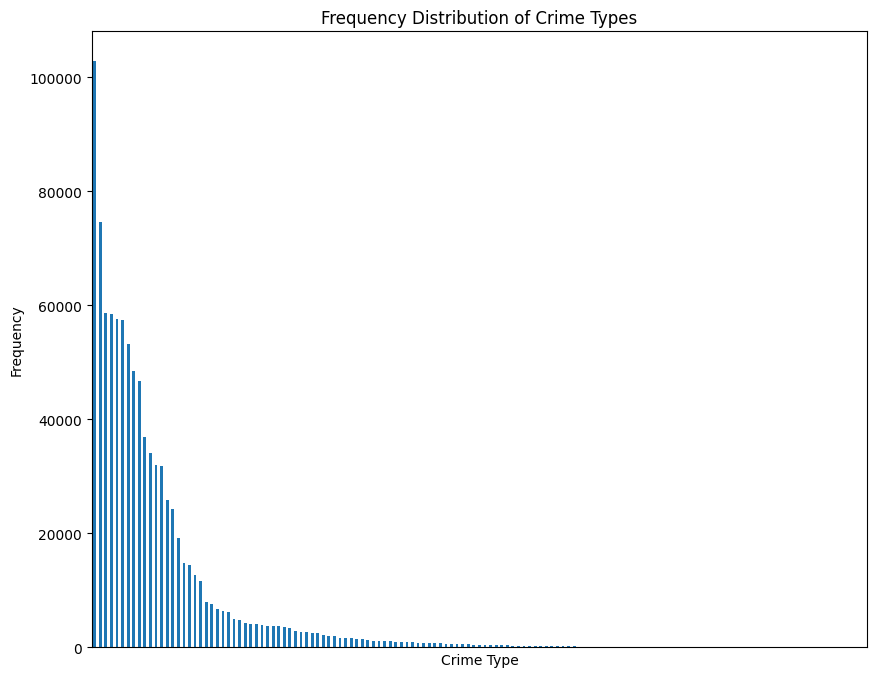

In [517]:
plt.figure(figsize=(10, 8))
crime_type_counts.plot(kind='bar')
plt.title('Frequency Distribution of Crime Types')
plt.xlabel('Crime Type')
plt.ylabel('Frequency')
plt.xticks([])
plt.show()


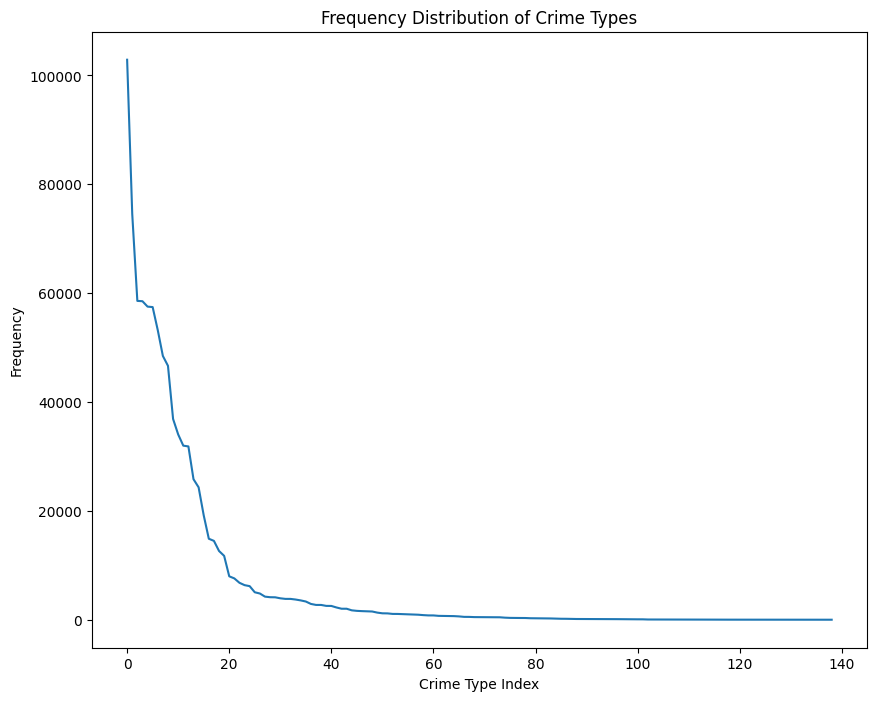

In [518]:
plt.figure(figsize=(10, 8))
plt.plot(crime_type_counts.values)  # This creates a line plot of the frequencies
plt.title('Frequency Distribution of Crime Types')
plt.xlabel('Crime Type Index')
plt.ylabel('Frequency')
plt.show()


### By Area

In [519]:
# Create crosstab
count_table = pd.crosstab(crime_la["crm cd desc"], crime_la["area name"])
count_table

area name,77TH,CENTRAL,DEVONSHIRE,FOOTHILL,HARBOR,HOLLENBECK,HOLLYWOOD,MISSION,NEWTON,NORTH HOLLYWOOD,...,OLYMPIC,PACIFIC,RAMPART,SOUTHEAST,SOUTHWEST,TOPANGA,VAN NUYS,WEST LA,WEST VALLEY,WILSHIRE
crm cd desc,,,,,,,,,,,,,,,,,,,,,
ARSON,202,231,52,93,89,99,127,100,180,141,...,142,125,132,156,110,54,93,76,84,129
ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,80,157,15,52,24,59,55,38,56,32,...,25,35,39,85,88,29,15,4,29,119
"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",5877,4037,1322,1730,2325,2327,2730,1974,3732,1965,...,2670,2012,3088,4840,3601,1525,1608,775,1767,1676
ATTEMPTED ROBBERY,480,456,110,103,168,169,287,164,366,160,...,297,166,353,352,319,126,121,101,154,171
BATTERY - SIMPLE ASSAULT,4703,6776,2678,2415,3137,3085,4481,2597,4148,3419,...,4378,3258,4122,3933,4501,2761,2848,2821,2736,3159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)",3,151,48,8,40,4,75,11,9,52,...,60,647,89,1,661,33,40,186,32,59
VIOLATION OF COURT ORDER,231,141,352,395,401,378,212,367,221,104,...,314,270,262,285,374,240,374,179,519,336
VIOLATION OF RESTRAINING ORDER,671,282,378,512,1196,740,422,1020,893,106,...,498,356,484,781,817,700,419,317,184,380


In [520]:
chi_squared_area_name = stats.chisquare(count_table, axis=None)
chi_squared_area_name

Power_divergenceResult(statistic=6359049.6893313285, pvalue=0.0)

In [521]:
# Select top 3 crime types based on frequency for clearer visualization
top_crime_types = crime_la['crm cd desc'].value_counts().nlargest(3).index
filtered_data = crime_la[crime_la['crm cd desc'].isin(top_crime_types)]

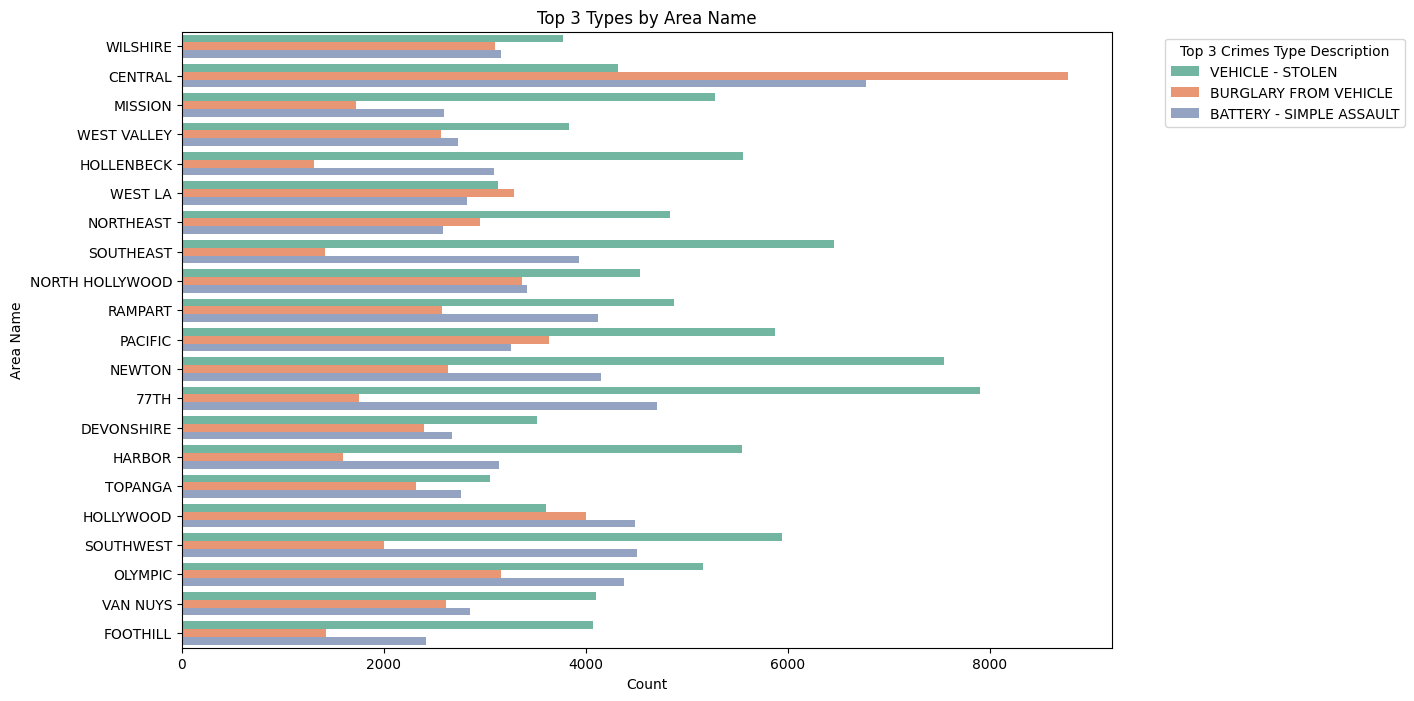

In [522]:
plt.figure(figsize=(12, 8))
sns.countplot(y='area name', hue='crm cd desc', data=filtered_data, palette='Set2')  # Changed to 'Set2'
plt.title('Top 3 Types by Area Name')
plt.xlabel('Count')
plt.ylabel('Area Name')
plt.legend(title='Top 3 Crimes Type Description', bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

### vict sex

In [523]:
# Create crosstab
count_table = pd.crosstab(crime_la["crm cd desc"], crime_la["vict sex"])
count_table

vict sex,F,M,X
crm cd desc,,,
ARSON,601,1203,739
ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,67,634,367
"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",14255,37939,1014
ATTEMPTED ROBBERY,1218,3094,504
BATTERY - SIMPLE ASSAULT,35000,39082,459
...,...,...,...
"VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)",207,528,1516
VIOLATION OF COURT ORDER,4321,1954,80
VIOLATION OF RESTRAINING ORDER,8887,2774,74


In [524]:
chi_squared_vict_sex = stats.chisquare(count_table, axis=None)
chi_squared_vict_sex

Power_divergenceResult(statistic=10676546.185930204, pvalue=0.0)

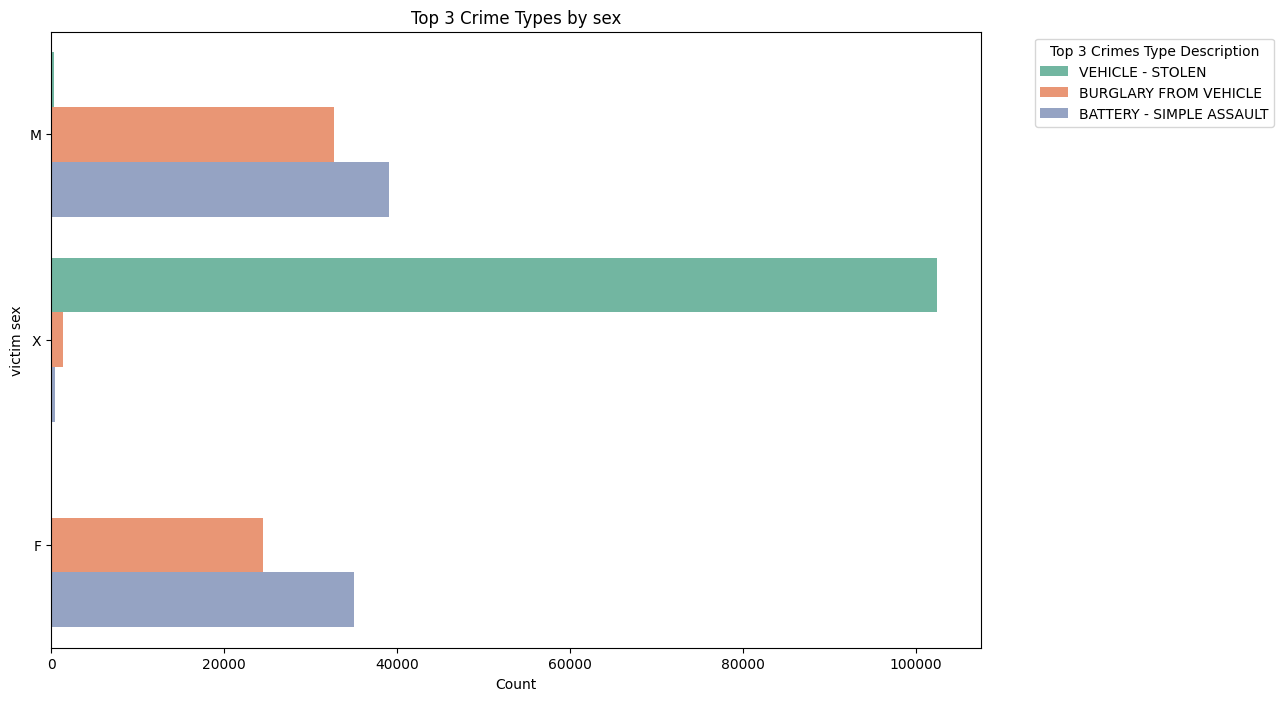

In [525]:
plt.figure(figsize=(12, 8))
sns.countplot(y='vict sex', hue='crm cd desc', data=filtered_data, palette='Set2')  # Changed to 'Set2'
plt.title('Top 3 Crime Types by sex')
plt.xlabel('Count')
plt.ylabel('victim sex')
plt.legend(title='Top 3 Crimes Type Description', bbox_to_anchor=(1.05, 1), loc=2)
plt.show()


In [526]:
# Filter data for 'VEHICLE - STOLEN' and male victims
filtered_stolen_vehicle = crime_la[(crime_la['crm cd desc'] == 'VEHICLE - STOLEN') & (crime_la['vict sex'] == 'M')]
filtered_stolen_vehicle

,date occ,time occ,area name,crm cd desc,vict age,vict sex,vict descent,premis desc,weapon desc,status desc,location,year,month,day
0,2020-03-01,2130,WILSHIRE,VEHICLE - STOLEN,1,M,O,STREET,X,Adult Arrest,1900 S LONGWOOD AV,2020,3,1
1482,2020-10-05,1000,WEST LA,VEHICLE - STOLEN,1,M,H,STREET,X,Invest Cont,MOORPARK,2020,10,5
5568,2020-07-05,1930,77TH,VEHICLE - STOLEN,64,M,W,STREET,X,Invest Cont,MANCHESTER AV,2020,7,5
11688,2020-10-04,2150,NORTHEAST,VEHICLE - STOLEN,17,M,H,STREET,X,Invest Cont,MARIPOSA,2020,10,4
12962,2020-06-02,935,WILSHIRE,VEHICLE - STOLEN,1,M,O,STREET,X,Adult Arrest,4000 W 23RD ST,2020,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943377,2024-03-12,1400,77TH,VEHICLE - STOLEN,27,M,H,ALLEY,X,Invest Cont,E 84TH ST,2024,3,12
943909,2024-02-17,1600,NEWTON,VEHICLE - STOLEN,30,M,H,STREET,X,Invest Cont,2800 S CENTRAL AV,2024,2,17
944254,2024-03-02,1400,SOUTHEAST,VEHICLE - STOLEN,28,M,H,STREET,X,Invest Cont,9600 N KALMIA ST,2024,3,2
946186,2024-01-16,2140,CENTRAL,VEHICLE - STOLEN,1,M,B,STREET,X,Invest Cont,700 S GRAND AV,2024,1,16


### vict descent

Descent Code: A - Other Asian B - Black C - Chinese D - Cambodian F - Filipino G - Guamanian H - Hispanic/Latin/Mexican I - American Indian/Alaskan Native J - Japanese K - Korean L - Laotian O - Other P - Pacific Islander S - Samoan U - Hawaiian V - Vietnamese W - White X - Unknown Z - Asian Indian

In [527]:
# Create crosstab
count_table = pd.crosstab(crime_la["crm cd desc"], crime_la["vict descent"])
count_table

vict descent,A,B,C,D,F,G,H,I,J,K,L,O,P,S,U,V,W,X,Z
crm cd desc,,,,,,,,,,,,,,,,,,,
ARSON,49,288,2,0,0,0,630,0,0,2,0,308,0,0,36,0,394,834,0
ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,17,23,0,0,0,0,239,0,0,1,0,109,0,0,0,0,203,476,0
"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",777,14353,0,1,19,4,26443,12,4,55,0,2748,0,2,3,3,7282,1500,2
ATTEMPTED ROBBERY,114,623,2,0,0,1,2507,3,0,10,0,364,0,1,0,0,638,553,0
BATTERY - SIMPLE ASSAULT,1909,14623,12,0,23,6,37428,14,6,134,0,5897,4,1,4,4,13767,707,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)",50,72,4,0,4,0,79,4,7,10,0,95,0,0,1,0,407,1516,2
VIOLATION OF COURT ORDER,127,957,2,0,8,0,3280,1,0,5,0,482,0,0,0,1,1396,96,0
VIOLATION OF RESTRAINING ORDER,195,1827,0,0,6,0,6920,3,0,19,0,657,1,0,0,3,1988,116,0


In [528]:
chi_squared_vict_descent = stats.chisquare(count_table, axis=None)
chi_squared_vict_descent

Power_divergenceResult(statistic=54314239.01209042, pvalue=0.0)

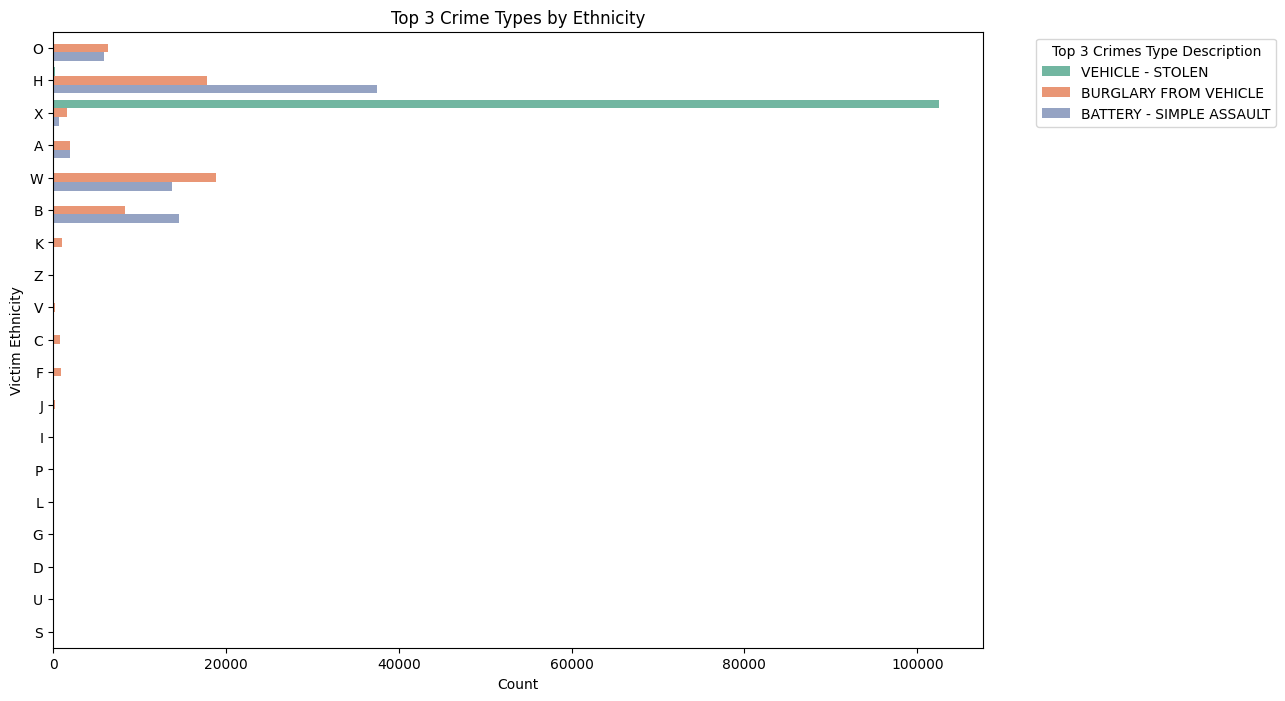

In [529]:
plt.figure(figsize=(12, 8))
sns.countplot(y='vict descent', hue='crm cd desc', data=filtered_data, palette='Set2')  # Changed to 'Set2'
plt.title('Top 3 Crime Types by Ethnicity')
plt.xlabel('Count')
plt.ylabel('Victim Ethnicity')
plt.legend(title='Top 3 Crimes Type Description', bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

### premis desc

In [530]:
# Create crosstab
count_table = pd.crosstab(crime_la["crm cd desc"], crime_la["premis desc"])
count_table

premis desc,7TH AND METRO CENTER (NOT LINE SPECIFIC),ABANDONED BUILDING ABANDONED HOUSE,ABATEMENT LOCATION,ABORTION CLINIC/ABORTION FACILITY*,AIRCRAFT,ALLEY,AMTRAK TRAIN,AMUSEMENT PARK*,APARTMENT/CONDO COMMON LAUNDRY ROOM,"ARCADE,GAME ROOM/VIDEO GAMES (EXAMPLE CHUCKIE CHEESE)*",...,"VEHICLE STORAGE LOT (CARS, TRUCKS, RV'S, BOATS, TRAILERS, ETC.)","VEHICLE, PASSENGER/TRUCK",VETERINARIAN/ANIMAL HOSPITAL,VIDEO RENTAL STORE,VISION CARE FACILITY*,WAREHOUSE,WATER FACILITY,WEBSITE,X,YARD (RESIDENTIAL/BUSINESS)
crm cd desc,,,,,,,,,,,,,,,,,,,,,
ARSON,4,12,0,0,0,72,0,0,2,0,...,1,139,0,0,0,7,0,0,2,25
ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,0,0,0,0,5,29,0,0,1,0,...,0,6,0,0,0,0,0,0,0,5
"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",18,14,2,1,2,1099,1,0,9,0,...,4,161,1,0,0,32,0,0,26,453
ATTEMPTED ROBBERY,6,0,0,0,0,74,0,0,0,0,...,0,22,0,0,1,2,0,0,6,8
BATTERY - SIMPLE ASSAULT,72,12,1,3,1,625,4,2,56,1,...,6,267,8,0,0,60,1,1,18,626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)",0,1,0,0,0,20,0,0,0,0,...,1,0,0,0,0,2,0,0,0,69
VIOLATION OF COURT ORDER,0,1,0,0,1,21,0,0,4,0,...,0,2,0,0,1,2,0,3,0,38
VIOLATION OF RESTRAINING ORDER,0,0,0,0,0,45,0,0,1,0,...,1,7,0,0,0,6,0,2,0,83


In [531]:
chi_squared_premis_desc = stats.chisquare(count_table, axis=None)
chi_squared_premis_desc

Power_divergenceResult(statistic=571479733.0361825, pvalue=0.0)

### weapon desc

In [532]:
# Create crosstab
count_table = pd.crosstab(crime_la["crm cd desc"], crime_la["weapon desc"])
count_table

weapon desc,AIR PISTOL/REVOLVER/RIFLE/BB GUN,ANTIQUE FIREARM,ASSAULT WEAPON/UZI/AK47/ETC,AUTOMATIC WEAPON/SUB-MACHINE GUN,AXE,BELT FLAILING INSTRUMENT/CHAIN,BLACKJACK,BLUNT INSTRUMENT,BOARD,BOMB THREAT,...,TIRE IRON,TOY GUN,UNK TYPE SEMIAUTOMATIC ASSAULT RIFLE,UNKNOWN FIREARM,UNKNOWN TYPE CUTTING INSTRUMENT,UNKNOWN WEAPON/OTHER WEAPON,UZI SEMIAUTOMATIC ASSAULT RIFLE,VEHICLE,VERBAL THREAT,X
crm cd desc,,,,,,,,,,,,,,,,,,,,,
ARSON,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,151,0,1,5,1793
ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,12,0,0,0,1,3,1,9,2,0,...,1,0,0,19,5,258,0,151,2,0
"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",1196,1,24,9,135,52,2,656,194,3,...,49,22,7,2960,485,5872,4,2380,165,3
ATTEMPTED ROBBERY,39,0,4,0,6,2,1,21,7,0,...,1,17,2,60,25,282,0,1,217,0
BATTERY - SIMPLE ASSAULT,12,0,0,0,1,83,0,166,23,2,...,0,10,0,3,2,5693,0,28,179,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,1,0,0,0,2239
VIOLATION OF COURT ORDER,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,22,0,0,112,6077
VIOLATION OF RESTRAINING ORDER,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,43,0,0,219,11119


In [533]:
chi_squared_weapon_desc = stats.chisquare(count_table, axis=None)
chi_squared_weapon_desc

Power_divergenceResult(statistic=433935808.8987945, pvalue=0.0)

In [534]:
print(f"The chi_squared for area name is: {chi_squared_area_name}")
print(f"The chi_squared for victim sex is: {chi_squared_vict_sex}")
print(f"The chi_squared for victim descent is: {chi_squared_vict_descent}")
print(f"The chi_squared for premise description is: {chi_squared_premis_desc}")
print(f"The chi_squared for weapon description is: {chi_squared_weapon_desc}")


The chi_squared for area name is: Power_divergenceResult(statistic=6359049.6893313285, pvalue=0.0)
The chi_squared for victim sex is: Power_divergenceResult(statistic=10676546.185930204, pvalue=0.0)
The chi_squared for victim descent is: Power_divergenceResult(statistic=54314239.01209042, pvalue=0.0)
The chi_squared for premise description is: Power_divergenceResult(statistic=571479733.0361825, pvalue=0.0)
The chi_squared for weapon description is: Power_divergenceResult(statistic=433935808.8987945, pvalue=0.0)


The **“premise description**” has the highest chi-squared statistic, indicating the **strongest association with the target variable “crime type”** (crm cd desc) among the variables tested.

### time occ

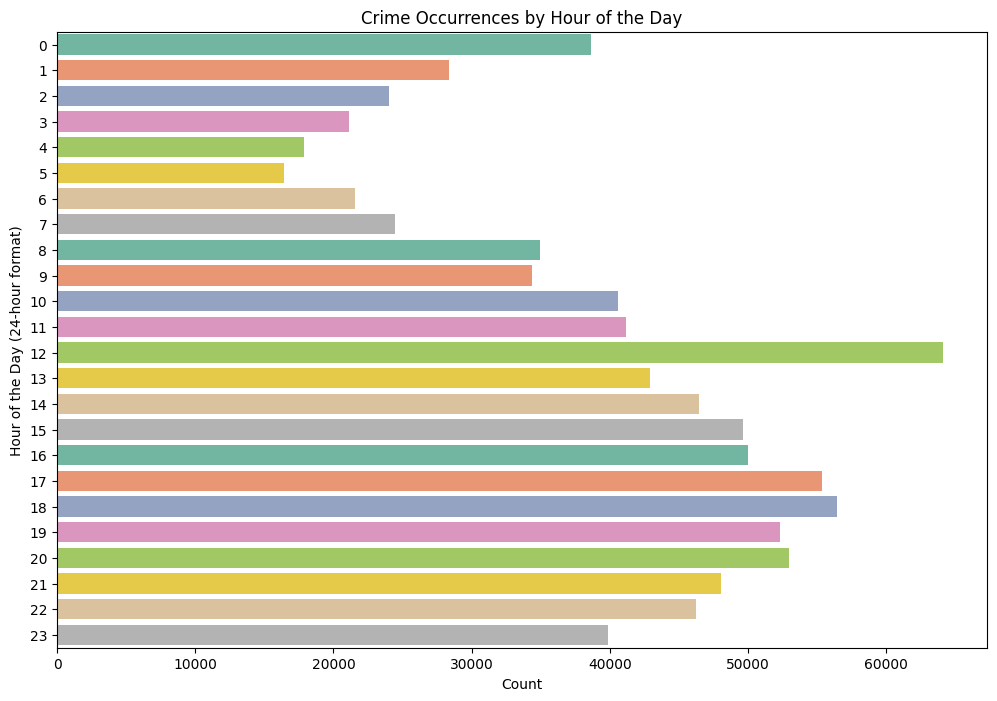

In [535]:
# Extract hour from the 'time occ' column
crime_la['hour'] = crime_la['time occ'] // 100

# Plot the count of each hour
plt.figure(figsize=(12, 8))
sns.countplot(y='hour', data=crime_la, palette='Set2')
plt.title('Crime Occurrences by Hour of the Day')
plt.xlabel('Count')
plt.ylabel('Hour of the Day (24-hour format)')
plt.show()

In [536]:
# Create a crosstab to see the count of crimes per hour
crosstab_hours = pd.crosstab(crime_la['hour'], columns="count")
print(crosstab_hours)

col_0  count
hour        
0      38648
1      28347
2      24035
3      21148
4      17896
5      16412
6      21565
7      24457
8      34973
9      34364
10     40607
11     41169
12     64078
13     42875
14     46418
15     49644
16     49977
17     55319
18     56434
19     52289
20     52964
21     48007
22     46256
23     39893


# Feature Engineering (EDA)

**Transforming the existing variables**

There are many reasons that existing variables may need to be transformed. Here are some key reasons:


Machine-learning models can only work with numeric variables. So, categorical variables that have text values need to be converted to numeric values.


Some machine-learning models assume that the target variable is normally distributed. To use these models, you may need to transform your target to be normally distributed.


Some machine-learning models are very sensitive to the relative magnitude of values. So, you may need to limit the values of the variables to some fixed range. Usually, you do this by normalizing your variables.


To improve your intuition and your understanding of the data, you may want to transform variables to a different unit of measurement.

In [537]:
unique_values = crime_la['crm cd desc'].unique()
unique_values

array(['VEHICLE - STOLEN', 'BURGLARY FROM VEHICLE', 'BIKE - STOLEN',
       'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)', 'THEFT OF IDENTITY',
       'BATTERY - SIMPLE ASSAULT',
       'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH',
       'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)',
       'SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ',
       'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
       'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD',
       'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',
       'CRIMINAL THREATS - NO WEAPON DISPLAYED',
       'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)',
       'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)',
       'CHILD ANNOYING (17YRS & UNDER)', 'BURGLARY', 'CONTEMPT OF COURT',
       'THEFT PLAIN - PETTY ($950 & UNDER)',
       'INTIMATE PARTNER - SIMPLE ASSAULT', 'LEWD CONDUCT',
       'THEFT PLAIN - ATTEMPT',
       'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)', 'ROBBERY',
      

Dropping columns because status is not relevant


In [538]:
# Drop the specified columns
crime_la = crime_la.drop(columns=['date occ', 'time occ'])

In [539]:
# Drop the specified columns
crime_la = crime_la.drop(columns=['status desc', 'location', 'premis desc'])

In [540]:
crime_la.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947775 entries, 0 to 947774
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   area name     947775 non-null  object
 1   crm cd desc   947775 non-null  object
 2   vict age      947775 non-null  int64 
 3   vict sex      947775 non-null  object
 4   vict descent  947775 non-null  object
 5   weapon desc   947775 non-null  object
 6   year          947775 non-null  int32 
 7   month         947775 non-null  int32 
 8   day           947775 non-null  int32 
 9   hour          947775 non-null  int64 
dtypes: int32(3), int64(2), object(5)
memory usage: 61.5+ MB


In [541]:
# Define violent crimes
violent_crimes = [
    'BATTERY - SIMPLE ASSAULT', 'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH',
    'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)', 'SEX, UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ',
    'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT', 'BATTERY WITH SEXUAL CONTACT',
    'INTIMATE PARTNER - AGGRAVATED ASSAULT', 'ORAL COPULATION', 'CRIMINAL THREATS - NO WEAPON DISPLAYED',
    'CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT', 'ATTEMPTED ROBBERY', 'RAPE, FORCIBLE',
    'RAPE, ATTEMPTED', 'HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE', 'HUMAN TRAFFICKING - COMMERCIAL SEX ACTS',
    'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER', 'KIDNAPPING - GRAND ATTEMPT', 'KIDNAPPING',
    'CRIMINAL HOMICIDE', 'BATTERY ON A FIREFIGHTER'
]

# Create binary target variable
crime_la['violent_crime'] = crime_la['crm cd desc'].apply(lambda x: 1 if x in violent_crimes else 0)

In [542]:
# Drop the specified columns
crime_la = crime_la.drop(columns=['crm cd desc'])

In [543]:
finaldataset = crime_la

In [544]:
crime_la.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947775 entries, 0 to 947774
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   area name      947775 non-null  object
 1   vict age       947775 non-null  int64 
 2   vict sex       947775 non-null  object
 3   vict descent   947775 non-null  object
 4   weapon desc    947775 non-null  object
 5   year           947775 non-null  int32 
 6   month          947775 non-null  int32 
 7   day            947775 non-null  int32 
 8   hour           947775 non-null  int64 
 9   violent_crime  947775 non-null  int64 
dtypes: int32(3), int64(3), object(4)
memory usage: 61.5+ MB


Classification problem

In [545]:
from sklearn.preprocessing import LabelEncoder

# Load data
df = crime_la

# Encode categorical variables
label_encoders = {}
for column in ['area name', 'vict sex', 'vict descent', 'weapon desc']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

---

# Modeling

In [546]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

Suitable Models for Classification

	1.	Logistic Regression: A simple and interpretable model for binary classification.
	2.	Random Forest: An ensemble method that can handle complex interactions between features and provide feature importance.
	3.	Gradient Boosting (e.g., XGBoost): Another ensemble method that often yields high accuracy.

## Logistic Regression

In [547]:
# Define features and target
X = df.drop(columns=['violent_crime'])
y = df['violent_crime']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [548]:
print(accuracy)
print(report)

0.819936166284192
              precision    recall  f1-score   support

           0       0.84      0.96      0.90    153668
           1       0.57      0.20      0.30     35887

    accuracy                           0.82    189555
   macro avg       0.70      0.58      0.60    189555
weighted avg       0.79      0.82      0.78    189555



The Logistic Regression model achieved an overall **accuracy of 82%**, demonstrating **good performance in predicting non-violent crimes** with a **precision of 0.84 and a recall of 0.96.** However, it **struggled with predicting violent crimes, showing lower precision (0.57) and recall (0.20)**, resulting in a modest **F1-score of 0.30**. This discrepancy indicates a **class imbalance**, as the dataset contains **significantly more non-violent crimes than violent ones**.

## Random Forest

In [549]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Define features and target
X = df.drop(columns=['violent_crime'])
y = df['violent_crime']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(accuracy)
print(report)

0.8767112447574582
              precision    recall  f1-score   support

           0       0.94      0.91      0.92    153668
           1       0.65      0.75      0.70     35887

    accuracy                           0.88    189555
   macro avg       0.80      0.83      0.81    189555
weighted avg       0.88      0.88      0.88    189555



The **Random Forest** model achieved an **accuracy of approximately 87.7%**. It shows **high precision (0.94)** and **recall (0.91)** **for predicting non-violent crimes** (class 0), and moderate **precision (0.65) and recall (0.75)** for **predicting violent crimes** (class 1). The **model performs better overall compared to logistic regression, especially in identifying violent crimes, with an f1-score of 0.70 for violent crimes and 0.92 for non-violent crimes**. This indicates the model's stronger ability to correctly identify violent crimes while maintaining high performance for non-violent crimes.

## Hyperprameters tuning

### Logistic Regression model

Reduce the max_iter parameter to make it converge faster. max_iter to 500 instead of 1000

In [550]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Define features and target
X = df.drop(columns=['violent_crime'])
y = df['violent_crime']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(accuracy)
print(report)

0.819936166284192
              precision    recall  f1-score   support

           0       0.84      0.96      0.90    153668
           1       0.57      0.20      0.30     35887

    accuracy                           0.82    189555
   macro avg       0.70      0.58      0.60    189555
weighted avg       0.79      0.82      0.78    189555



The results for both Logistic Regression models, with `max_iter` set to 1000 and 500 respectively, **are identical**, yielding an accuracy of 81.99%. The precision, recall, and f1-scores for non-violent crimes (class 0) are consistently high (0.84, 0.96, and 0.90), while those for violent crimes (class 1) are significantly lower (0.57, 0.20, and 0.30). This indicates that **reducing the `max_iter` to 500 did not impact the performance**, suggesting that the model likely converged well before reaching the 500 iterations.

### Randon Forest Model

Reduce the number of trees (n_estimators)

Set n_estimators to 50 instead of 100.

In [551]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


# Define features and target
X = df.drop(columns=['violent_crime'])
y = df['violent_crime']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(accuracy)
print(report)

0.8758829891060642
              precision    recall  f1-score   support

           0       0.94      0.91      0.92    153668
           1       0.65      0.73      0.69     35887

    accuracy                           0.88    189555
   macro avg       0.79      0.82      0.81    189555
weighted avg       0.88      0.88      0.88    189555



The Random Forest model with `n_estimators=100` achieved an accuracy of 87.67%, with a precision of 0.94 and recall of 0.91 for non-violent crimes (class 0), and a precision of 0.65 and recall of 0.75 for violent crimes (class 1), resulting in an f1-score of 0.70 for violent crimes. **Reducing the `n_estimators` to 50 slightly decreased the accuracy to 87.59%**, with similar precision (0.94) and recall (0.91) for non-violent crimes, and slightly lower precision (0.65) and recall (0.73) for violent crimes, resulting in an f1-score of 0.69 for violent crimes. **Both configurations of the Random Forest model performed significantly better than the Logistic Regression models**, particularly in **detecting violent crimes**, demonstrating the Random Forest model's robustness and suitability for this classification task.

# Conclusion

The results for **both Logistic Regression models, with `max_iter` set to 1000 and 500 respectively, are identical**, yielding an **accuracy of 81.99%**. The precision, recall, and f1-scores for non-violent crimes (class 0) are consistently high (0.84, 0.96, and 0.90), while those for violent crimes (class 1) are significantly lower (0.57, 0.20, and 0.30).

This indicates that reducing the `max_iter` to 500 did not impact the performance, suggesting that the model likely converged well before reaching the 500 iterations.


The **Random Forest model**, with **`n_estimators` set to 100**, achieved a **higher accuracy of 87.67%**, with improved recall and f1-score for violent crimes (0.65 and 0.70, respectively), indicating a **better overall performance, particularly in identifying violent crimes, compared to the Logistic Regression models**.

# Predictions playground

In [552]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import ipywidgets as widgets
from IPython.display import display

# Function to make predictions based on user input and return probability
def predict_crime(area_name, vict_age, vict_sex, vict_descent, weapon_desc, year, month, day, hour):
    input_data = np.array([[area_name, vict_age, vict_sex, vict_descent, weapon_desc, year, month, day, hour]])
    prediction = model.predict(input_data)
    probability = model.predict_proba(input_data)
    if prediction[0] == 1:
        return f"{probability[0][1]*100:.2f}% chance of Violent Crime"
    else:
        return f"{probability[0][0]*100:.2f}% chance of Non-Violent Crime"

# Interactive user input
def on_button_clicked(b):
    area_name = int(area_name_widget.value)
    vict_age = int(vict_age_widget.value)
    vict_sex = int(vict_sex_widget.value)
    vict_descent = int(vict_descent_widget.value)
    weapon_desc = int(weapon_desc_widget.value)
    year = int(year_widget.value)
    month = int(month_widget.value)
    day = int(day_widget.value)
    hour = int(hour_widget.value)
    prediction = predict_crime(area_name, vict_age, vict_sex, vict_descent, weapon_desc, year, month, day, hour)
    output_widget.clear_output()
    with output_widget:
        print(prediction)

area_name_widget = widgets.Text(description='Area Name:')
vict_age_widget = widgets.IntText(description='Victim Age:')
vict_sex_widget = widgets.Text(description='Victim Sex:')
vict_descent_widget = widgets.Text(description='Victim Descent:')
weapon_desc_widget = widgets.Text(description='Weapon Desc:')
year_widget = widgets.IntText(description='Year:')
month_widget = widgets.IntText(description='Month:')
day_widget = widgets.IntText(description='Day:')
hour_widget = widgets.IntText(description='Hour:')

button = widgets.Button(description='Predict Crime')
button.on_click(on_button_clicked)

output_widget = widgets.Output()

display(area_name_widget, vict_age_widget, vict_sex_widget, vict_descent_widget, weapon_desc_widget, year_widget, month_widget, day_widget, hour_widget, button, output_widget)

Text(value='', description='Area Name:')

IntText(value=0, description='Victim Age:')

Text(value='', description='Victim Sex:')

Text(value='', description='Victim Descent:')

Text(value='', description='Weapon Desc:')

IntText(value=0, description='Year:')

IntText(value=0, description='Month:')

IntText(value=0, description='Day:')

IntText(value=0, description='Hour:')

Button(description='Predict Crime', style=ButtonStyle())

Output()

See instructions below

**INTRUCTIONS**


**Example for prediction input**

Area Name: 20

Victim Age: 30

Victim Sex: 1

Victim Descent: 11

Weapon Desc: 63

Year: 2023

Month: 5

Day: 1

Hour: 12

**Meaning:**

Area Name: WILSHIRE

Victim Age: 30 years old

Victim Sex: Male

Victim Descent: Ethnicity 'Other'

Weapon Desc: STICK

Year: 2023

Month: May

Day: 1st day of the month

Hour: Noon

In [553]:
print(f'Total time elapsed: {round(time.time() - start, 2)} seconds.')

Total time elapsed: 350.76 seconds.
